# BGeriDepressScale

Analizamos una base de datos del estudio "SEVERE HYPOGLYCEMIA IN  OLDER ADULTS WITH TYPE 1 DIABETES, A Study to Identify Factors Associated  with the Occurrence of Severe Hypoglycemia in Older Adults with T1D" 
Recordemos que la hipoglicemia son niveles bajos de azúcar en sangre.

Abordamos un problema de clasificación que nuestra salida será si es un paciente caso o control 
 - Caso. evento SH (Severe Hipoglucemia) en los últimos 12 meses
 - Control . NO SH en los últimos 3 años.

Descargamos la base de datos BGeriDepressScale, esta esta formada por un formulario adjuntado en la carpeta comprimida que se centra en analizar el estado de ánimo de los pacientes. 

La juntamos con la salida mediante el método de "merge"


In [1]:
import pandas as pd
import numpy as np
import seaborn as ss
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib


from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score


from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

In [2]:
#Cargamos la base de datos y la guardamos en un dataframe
data1 = pd.read_csv("BGeriDepressScale_new.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
data1.head() # Muestra las primeras 5 filas

,RecID,PtID,GeriDepressScale1tDone,GeriDepressScaleCompDaysFromEnroll,BasicSatLife,DroppedActInt,LifeEmpty,BoredOften,GoodSpirits,AfraidBad,HappyMostTime,HelplessOften,PrefStayHome,MoreMemProb,WondAlive,Worthless,FullEnergy,HopelessSit,MostPplBetterOff
0,9,199,NaN,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,1,1,1
1,19,56,NaN,0,0,1,0,0,0,0.0,0.0,0,1.0,0,1.0,0,0,1,0
2,14,201,NaN,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1
3,15,107,NaN,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,0,0,1,1
4,18,47,NaN,11,0,0,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1


In [3]:
data1.shape

(201, 19)

In [4]:
#Cargamos la base de datos y la guardamos en un dataframe
roster = pd.read_csv("BPtRoster.csv") #Se puede cambiar la base de datos

# Mostramos las primeras observaciones
roster.head() # Muestra las primeras 5 filas

,RecID,PtID,BCaseControlStatus
0,6,199,Case
1,8,194,Case
2,9,56,Control
3,10,201,Case
4,11,107,Control


In [5]:
data1 = pd.merge(roster,data1, on = "PtID")
data1.head()

,RecID_x,PtID,BCaseControlStatus,RecID_y,GeriDepressScale1tDone,GeriDepressScaleCompDaysFromEnroll,BasicSatLife,DroppedActInt,LifeEmpty,BoredOften,...,AfraidBad,HappyMostTime,HelplessOften,PrefStayHome,MoreMemProb,WondAlive,Worthless,FullEnergy,HopelessSit,MostPplBetterOff
0,6,199,Case,9,NaN,0,0,1,1,1,...,1.0,0.0,1,1.0,1,0.0,1,1,1,1
1,9,56,Control,19,NaN,0,0,1,0,0,...,0.0,0.0,0,1.0,0,1.0,0,0,1,0
2,10,201,Case,14,NaN,0,0,1,1,1,...,1.0,0.0,1,1.0,1,0.0,1,0,1,1
3,11,107,Control,15,NaN,0,0,1,1,1,...,1.0,0.0,1,1.0,1,0.0,0,0,1,1
4,26,47,Case,18,NaN,11,0,0,1,1,...,1.0,0.0,1,1.0,1,0.0,1,0,1,1


# Preprocesado
## Valores nulos

Outliers remplazados por la moda.

Eliminamos la variable "GeriDepressScaleNotDone", que cuenta con la mayoría de los valores nulos.

In [7]:
data1.isnull().sum()

RecID_x                                 0
PtID                                    0
BCaseControlStatus                      0
RecID_y                                 0
GeriDepressScale1tDone                201
GeriDepressScaleCompDaysFromEnroll      0
BasicSatLife                            0
DroppedActInt                           0
LifeEmpty                               0
BoredOften                              0
GoodSpirits                             0
AfraidBad                               1
HappyMostTime                           1
HelplessOften                           0
PrefStayHome                            1
MoreMemProb                             0
WondAlive                               1
Worthless                               0
FullEnergy                              0
HopelessSit                             0
MostPplBetterOff                        0
dtype: int64

In [8]:
df_nonnan_afraidBad = data1["AfraidBad"].dropna()
df_nonnan_HappyMostTime = data1["HappyMostTime"].dropna()
df_nonnan_PrefStayHome = data1["PrefStayHome"].dropna()
df_nonnan_WondAlive = data1["WondAlive"].dropna()

In [11]:
from scipy import stats
mode_afraidBad = stats.mode(df_nonnan_afraidBad.values)[0][0]
mode_HappyMostTime = stats.mode(df_nonnan_HappyMostTime.values)[0][0]
mode_PrefStayHome = stats.mode(df_nonnan_PrefStayHome.values)[0][0]
mode_WondAlive = stats.mode(df_nonnan_WondAlive.values)[0][0]


In [12]:
data1["AfraidBad"].fillna(mode_afraidBad, inplace = True) 
data1["HappyMostTime"].fillna(mode_HappyMostTime, inplace = True) 
data1["PrefStayHome"].fillna(mode_PrefStayHome, inplace = True) 
data1["WondAlive"].fillna(mode_WondAlive, inplace = True)

In [13]:
data = data1.drop(columns = ["GeriDepressScale1tDone","RecID_x","RecID_y", "PtID"])

In [14]:
data.head()

,BCaseControlStatus,GeriDepressScaleCompDaysFromEnroll,BasicSatLife,DroppedActInt,LifeEmpty,BoredOften,GoodSpirits,AfraidBad,HappyMostTime,HelplessOften,PrefStayHome,MoreMemProb,WondAlive,Worthless,FullEnergy,HopelessSit,MostPplBetterOff
0,Case,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,1,1,1
1,Control,0,0,1,0,0,0,0.0,0.0,0,1.0,0,1.0,0,0,1,0
2,Case,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1
3,Control,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,0,0,1,1
4,Case,11,0,0,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1


In [15]:
data_input = data.drop(columns = ["BCaseControlStatus"])

In [16]:
data_input.isnull().sum()

GeriDepressScaleCompDaysFromEnroll    0
BasicSatLife                          0
DroppedActInt                         0
LifeEmpty                             0
BoredOften                            0
GoodSpirits                           0
AfraidBad                             0
HappyMostTime                         0
HelplessOften                         0
PrefStayHome                          0
MoreMemProb                           0
WondAlive                             0
Worthless                             0
FullEnergy                            0
HopelessSit                           0
MostPplBetterOff                      0
dtype: int64

In [17]:
data_output = data1["BCaseControlStatus"]


In [18]:
data_output = data1["BCaseControlStatus"].replace("Case",1).replace("Control",0)

In [19]:
data_input = data_input.iloc[:,1:]
data_input.head()

,BasicSatLife,DroppedActInt,LifeEmpty,BoredOften,GoodSpirits,AfraidBad,HappyMostTime,HelplessOften,PrefStayHome,MoreMemProb,WondAlive,Worthless,FullEnergy,HopelessSit,MostPplBetterOff
0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,1,1,1
1,0,1,0,0,0,0.0,0.0,0,1.0,0,1.0,0,0,1,0
2,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1
3,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,0,0,1,1
4,0,0,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1


# Representación

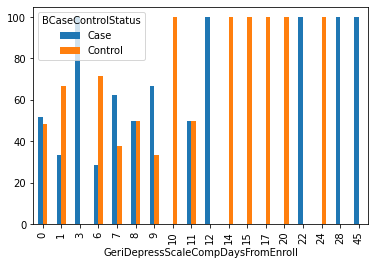

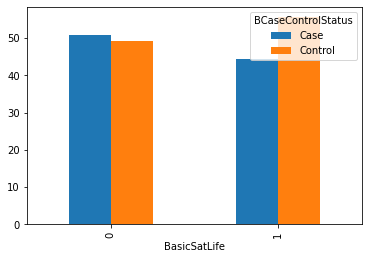

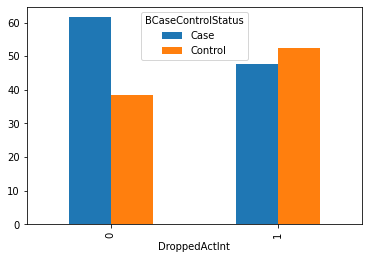

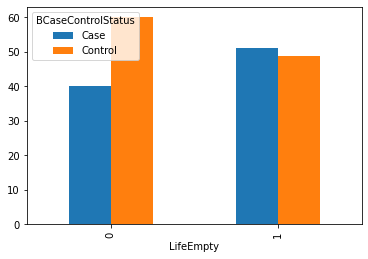

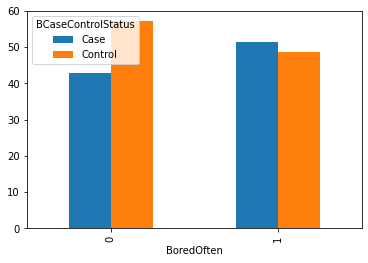

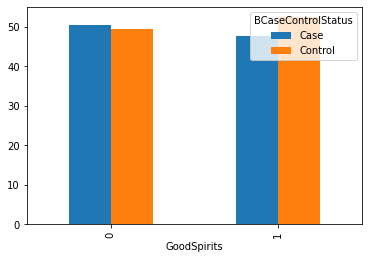

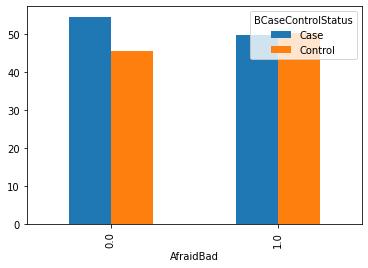

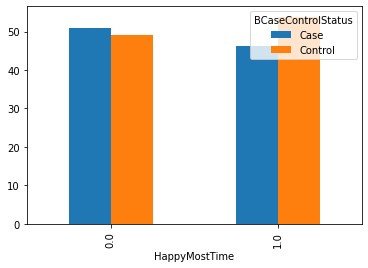

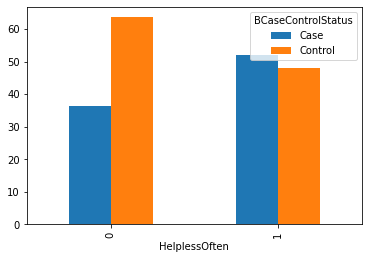

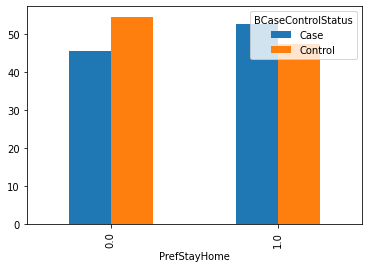

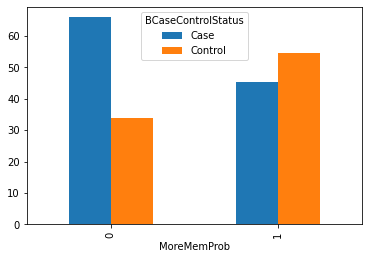

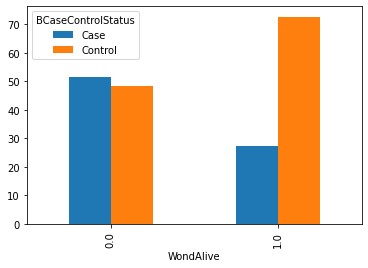

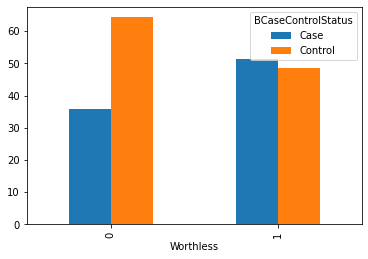

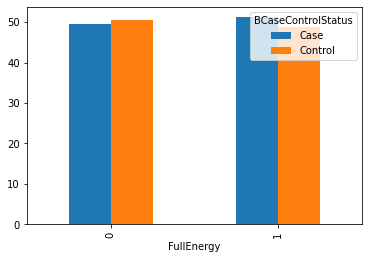

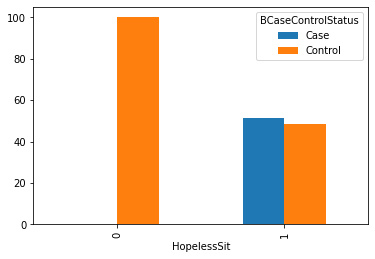

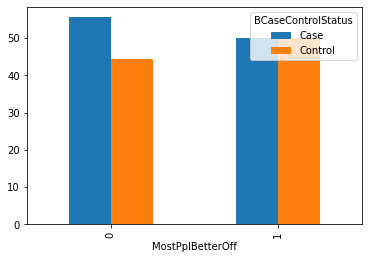

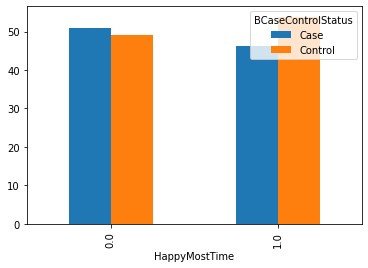

In [20]:
# Gráfico de barras segun clase
plot = pd.crosstab(index=data['GeriDepressScaleCompDaysFromEnroll'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['BasicSatLife'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['DroppedActInt'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras segun clase
plot = pd.crosstab(index=data['LifeEmpty'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barrassegun clase
plot = pd.crosstab(index=data['BoredOften'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

# Gráfico de barras segun clase
plot = pd.crosstab(index=data['GoodSpirits'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['AfraidBad'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['HappyMostTime'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras segun clase
plot = pd.crosstab(index=data['HelplessOften'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barrassegun clase
plot = pd.crosstab(index=data['PrefStayHome'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

plot = pd.crosstab(index=data['MoreMemProb'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['WondAlive'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras segun clase
plot = pd.crosstab(index=data['Worthless'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barrassegun clase
plot = pd.crosstab(index=data['FullEnergy'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
                                           
# Gráfico de barras segun clase
plot = pd.crosstab(index=data['HopelessSit'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barrassegun clase
plot = pd.crosstab(index=data['MostPplBetterOff'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

# Gráfico de barras  segun clase
plot = pd.crosstab(index=data['HappyMostTime'],
            columns=data['BCaseControlStatus']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')
# Gráfico de barras segun clase

In [21]:
list_cat_features=['GeriDepressScaleCompDaysFromEnroll','BasicSatLife','DroppedActInt', "LifeEmpty", "BoredOften", "GoodSpirits", "AfraidBad", "HappyMostTime", "HelplessOften", "PrefStayHome", "MoreMemProb", "WondAlive", "Worthless" , "FullEnergy", "HopelessSit", "MostPplBetterOff", "HappyMostTime"]

In [22]:
from collections import Counter
def get_unique_categories_and_probs(x, n_samples, flag_normalize):
    counter_samples = Counter(x)
    dict_counter_samples = dict(counter_samples)

    x_unique = np.array(list(dict_counter_samples.keys()))
    counts_categories = np.array(list(dict_counter_samples.values()))

    y_pos = np.arange(len(x_unique))

    if flag_normalize:
        probs = np.array(counts_categories) / n_samples
    else:
        probs = np.array(counts_categories)

    return x_unique, probs, y_pos

In [23]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
n_samples=data1.shape[0]
flag_normalize=True
width=0.35
for column_name in list_cat_features:
    high=data1[data1.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
    high2=data1[data1.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  # plt.hist([high, high2], bins=80, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  # plt.show()
    x_unique1, probs1, y_pos1 = get_unique_categories_and_probs(high, n_samples, flag_normalize)
    x_unique2, probs2, y_pos2 = get_unique_categories_and_probs(high2, n_samples, flag_normalize)
    plt.bar(y_pos1 - width/2, probs1, width, label='class1', color='#0070FF')
    plt.bar(y_pos2 + width/2, probs2, width, label='class2', color='#FF8E07')
    plt.xticks(y_pos2, x_unique2, rotation=90, fontsize = 16)
    plt.yticks(fontsize = 16)
  # plt.set_xticklabels([fmt_cat(i) for i in x_unique1], rotation='vertical')
    plt.tight_layout()
    plt.savefig("{}.pdf".format(column_name))
    plt.close()

# Modelos de ML

In [24]:
model   =[]
mean = []
std = []

model2   =[]
mean2 = []
std2 = []

In [25]:
#data_input = data_input.drop(columns =["class"])

In [26]:
data_input.head()

,BasicSatLife,DroppedActInt,LifeEmpty,BoredOften,GoodSpirits,AfraidBad,HappyMostTime,HelplessOften,PrefStayHome,MoreMemProb,WondAlive,Worthless,FullEnergy,HopelessSit,MostPplBetterOff
0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,1,1,1
1,0,1,0,0,0,0.0,0.0,0,1.0,0,1.0,0,0,1,0
2,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1
3,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,0,0,1,1
4,0,0,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1


In [27]:
#X_train = X_train.iloc[:,1:]
#X_test = X_test.iloc[:,1:]

# KNN

In [28]:
from sklearn.metrics import roc_auc_score
def knn (X_train,X_test,Y_train,Y_test,seed):
    param_grid = {'n_neighbors': range(1,50,2)}
    k_grid = np.array(range(1,50,2))
    grid_knn = GridSearchCV(KNeighborsClassifier(metric = 'hamming'), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)

    grid_knn.fit(X_train, Y_train) 
      #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
    auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])

    plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
    plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
    plt.xlabel('k',fontsize=14)
    plt.ylabel('roc_auc',fontsize=14)
    plt.legend()
    plt.show()
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
    print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))
      # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol

    grid_knn.get_params()
      # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test

    kNN_clasif_all = grid_knn.best_estimator_
    modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)
    y_output_knn2 = modelo_knn_clasif2.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
    Especificidad = tn / (tn + fp)

    print(accuracy_score(Y_test, y_output_knn2))
    print(confusion_matrix(Y_test, y_output_knn2))
    Sensibilidad= recall_score(Y_test, y_output_knn2)
    Accuracy = accuracy_score(Y_test, y_output_knn2)
    roc = roc_auc_score(Y_test, y_output_knn2)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, roc, Especificidad)

(160, 15) (160,) (41, 15) (41,)


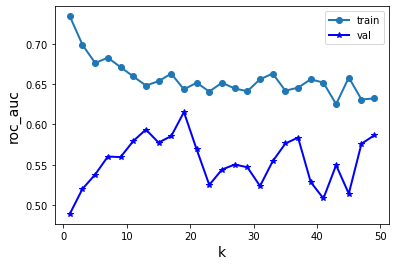

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.615
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.43902439024390244
[[ 6 14]
 [ 9 12]]
Sensibilidad y Accuracy 0.5714285714285714 0.43902439024390244


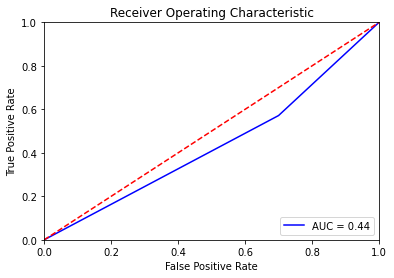

(160, 15) (160,) (41, 15) (41,)


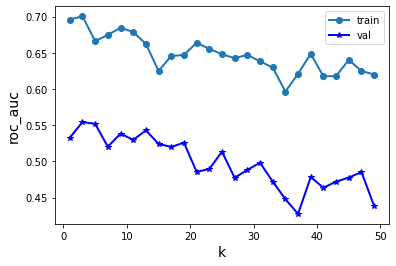

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.554
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.4634146341463415
[[12  8]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.4634146341463415


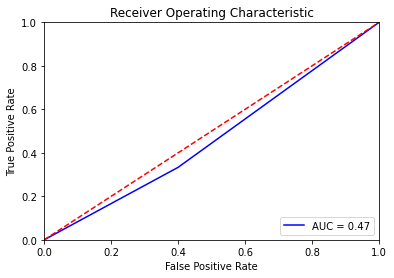

(160, 15) (160,) (41, 15) (41,)


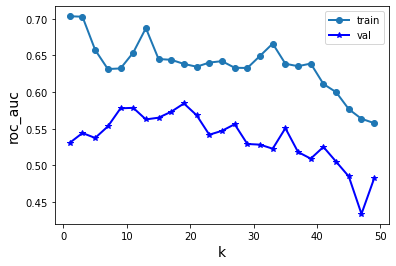

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.584
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.5365853658536586
[[15  5]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5365853658536586


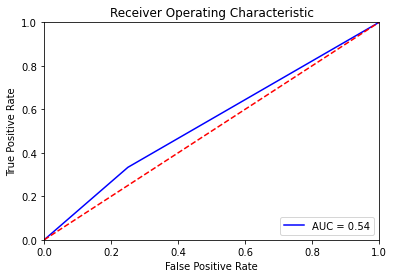

(160, 15) (160,) (41, 15) (41,)


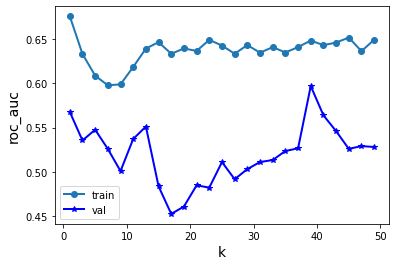

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.597
Valor correspondiente para el hiperparámetro: {'n_neighbors': 39}
0.5121951219512195
[[10 10]
 [10 11]]
Sensibilidad y Accuracy 0.5238095238095238 0.5121951219512195


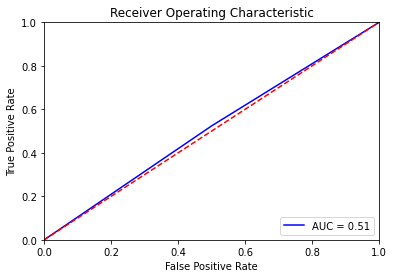

(160, 15) (160,) (41, 15) (41,)


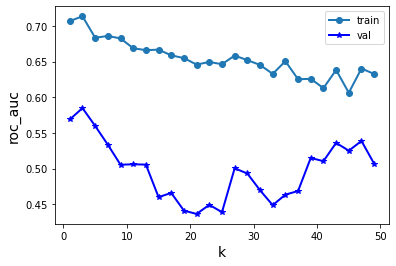

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.585
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}
0.4634146341463415
[[ 8 12]
 [10 11]]
Sensibilidad y Accuracy 0.5238095238095238 0.4634146341463415


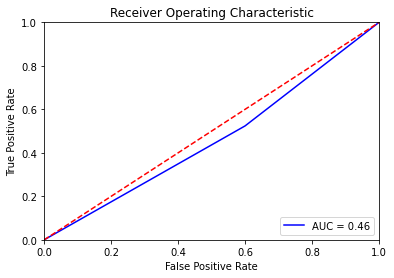

In [29]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)


    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[3])
    espe.append(b[4])

In [30]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...

print(media_knn, desviacion_estandar_knn)
model.append("KNN")
mean.append(media_knn)
std.append(desviacion_estandar_knn)
media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)


media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2.append("KNN")
mean2.append(media_knn2)
std2.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)


media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.4829268292682927 0.04007726030525607
0.48357142857142854 0.04249516445747177
0.45714285714285713 0.1146818531313552
0.51 0.1746424919657298


# SVC

In [31]:
from sklearn import svm
from sklearn.svm import SVC
def svc (X_train,X_test,Y_train,Y_test, seed):

  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
    svc=SVC(decision_function_shape='ovo')
    parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],

                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

    svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)
    svc.fit(X_train, Y_train) #Entrenamos
  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
    roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
    roc_svc_val = np.array(svc.cv_results_['mean_test_score'])
  # Mostramos el mejor valor del parámetro y el score
    print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
    print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))
  # 2. Consulta de los valores de los hiper-parámetros 
    svc.get_params()
  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    svc_classif = svc.best_estimator_
    modelo_svc = svc_classif.fit(X_train, Y_train)
    y_output_svc = modelo_svc.predict(X_test)

    print(accuracy_score(Y_test, y_output_svc))

    print(confusion_matrix(Y_test, y_output_svc))

    Sensibilidad= recall_score(Y_test, y_output_svc)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
    Especificidad = tn / (tn + fp)

    Accuracy = accuracy_score(Y_test, y_output_svc)
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)

    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
    roc_auc = metrics.auc(fpr, tpr)
    roc = roc_auc_score(Y_test, y_output_svc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return (Sensibilidad, Accuracy, roc_auc, roc, Especificidad)

(160, 15) (160,) (41, 15) (41,)
Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.584
0.5121951219512195
[[17  3]
 [17  4]]
Sensibilidad y Accuracy 0.19047619047619047 0.5121951219512195


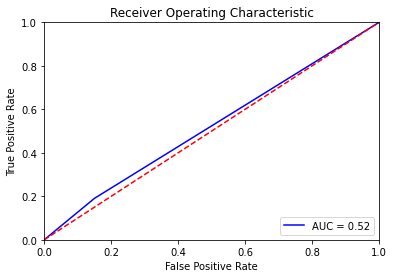

(160, 15) (160,) (41, 15) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.480
0.5365853658536586
[[ 6 14]
 [ 5 16]]
Sensibilidad y Accuracy 0.7619047619047619 0.5365853658536586


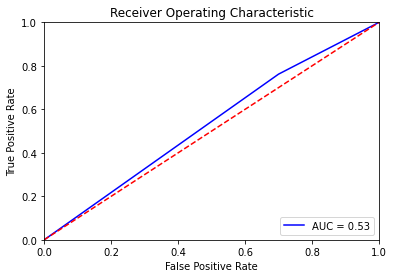

(160, 15) (160,) (41, 15) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.516
0.5121951219512195
[[14  6]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5121951219512195


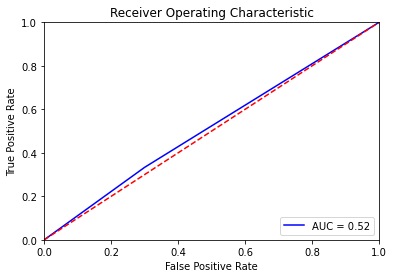

(160, 15) (160,) (41, 15) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.36585365853658536
[[12  8]
 [18  3]]
Sensibilidad y Accuracy 0.14285714285714285 0.36585365853658536


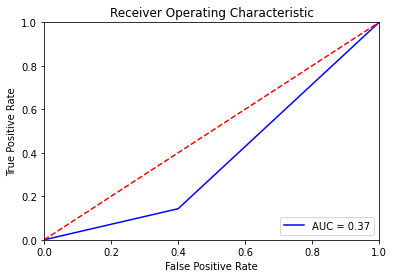

(160, 15) (160,) (41, 15) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5609756097560976
[[10 10]
 [ 8 13]]
Sensibilidad y Accuracy 0.6190476190476191 0.5609756097560976


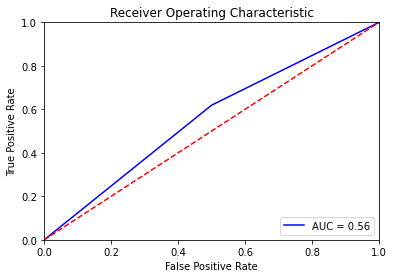

[0.19047619047619047, 0.7619047619047619, 0.3333333333333333, 0.14285714285714285, 0.6190476190476191] [0.5121951219512195, 0.5365853658536586, 0.5121951219512195, 0.36585365853658536, 0.5609756097560976] [0.5202380952380952, 0.530952380952381, 0.5166666666666666, 0.3714285714285714, 0.5595238095238095]


In [32]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[3])
    espe.append(b[4])



print(sensi, accuracy, roc)

In [33]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model.append("SVM")
mean.append(media_svc)
std.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2.append("SVM")
mean2.append(media_svc2)
std2.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)


media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.4975609756097561 0.0763535406951148
0.49976190476190474 0.07368653347403108
0.4095238095238095 0.27063375692157754
0.59 0.2073644135332772


## DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_std_all_train, X_std_all_test, Y_train, Y_test,seed):
    
    #std_all = preprocessing.StandardScaler().fit(X_train) #Extraemos las características y hacemos la estadndarización
    #X_std_all_train = std_all.transform(X_train) #tiene las 8 características estandarizadas
    #X_std_all_test = std_all.transform(X_test)
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,9)}
    profundidad_grid = np.array(range(1,9))

    print(X_std_all_train)
  #  X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)

    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=seed), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_std_all_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    
    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    print(grid_arbol_clasif.get_params())


    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_std_all_train, Y_train)

    y_output_arbol = modelo_arbol_clasif.predict(X_std_all_test)
    print(accuracy_score(Y_test, y_output_arbol))
    print(confusion_matrix(Y_test, y_output_arbol))
    tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
    Especificidad = tn / (tn + fp)
    Sensibilidad= recall_score(Y_test, y_output_arbol)
    Accuracy = accuracy_score(Y_test, y_output_arbol)
    roc = roc_auc_score(Y_test, y_output_arbol)
    
    print("Sensibilidad y Accuracy",Sensibilidad, Accuracy)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return (Sensibilidad, Accuracy, roc_auc, roc, Especificidad)




(160, 15) (160,) (41, 15) (41,)
     BasicSatLife  DroppedActInt  LifeEmpty  BoredOften  GoodSpirits  \
26              0              1          1           1            0   
1               0              1          0           0            0   
162             0              1          1           1            0   
25              0              1          1           0            0   
94              0              0          0           1            1   
..            ...            ...        ...         ...          ...   
53              0              1          1           0            0   
115             1              0          1           1            0   
178             0              0          1           1            0   
99              0              1          0           0            1   
119             0              1          1           1            0   

     AfraidBad  HappyMostTime  HelplessOften  PrefStayHome  MoreMemProb  \
26         1.0            0.

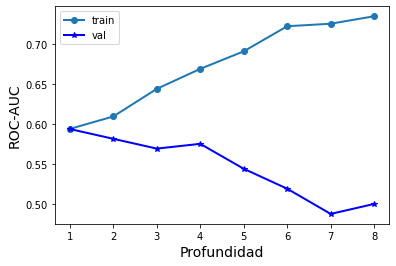

Mejor ROC-AUC en validación cruzada: 0.594
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4878048780487805
[[18  2]
 [19  2]]
Sensibilidad y Accuracy 0.09523809523809523 0.4878048780487805


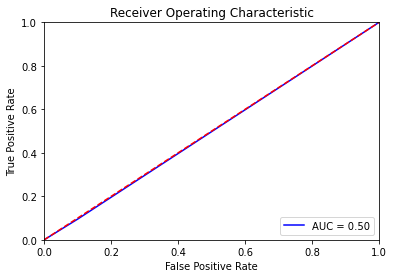

(160, 15) (160,) (41, 15) (41,)
     BasicSatLife  DroppedActInt  LifeEmpty  BoredOften  GoodSpirits  \
150             0              1          1           1            0   
197             0              1          1           1            0   
58              0              1          1           1            0   
161             0              1          1           1            0   
86              0              1          1           1            0   
..            ...            ...        ...         ...          ...   
107             0              1          1           1            0   
49              0              1          1           1            0   
114             0              1          1           0            0   
128             0              1          1           1            0   
50              0              1          1           1            0   

     AfraidBad  HappyMostTime  HelplessOften  PrefStayHome  MoreMemProb  \
150        1.0            0.

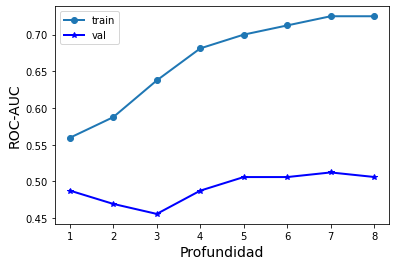

Mejor ROC-AUC en validación cruzada: 0.512
Mejor valor del hiperparámetro: {'max_depth': 7}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5365853658536586
[[ 5 15]
 [ 4 17]]
Sensibilidad y Accuracy 0.8095238095238095 0.5365853658536586


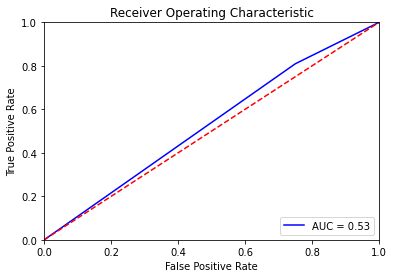

(160, 15) (160,) (41, 15) (41,)
     BasicSatLife  DroppedActInt  LifeEmpty  BoredOften  GoodSpirits  \
131             1              0          1           0            0   
30              0              1          1           1            0   
168             1              1          1           1            1   
154             0              1          1           1            0   
28              0              0          1           0            0   
..            ...            ...        ...         ...          ...   
46              0              1          1           1            0   
5               0              1          1           1            0   
58              0              1          1           1            0   
151             0              1          1           0            0   
183             0              1          1           1            0   

     AfraidBad  HappyMostTime  HelplessOften  PrefStayHome  MoreMemProb  \
131        1.0            1.

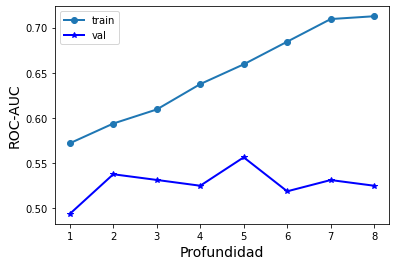

Mejor ROC-AUC en validación cruzada: 0.556
Mejor valor del hiperparámetro: {'max_depth': 5}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4634146341463415
[[15  5]
 [17  4]]
Sensibilidad y Accuracy 0.19047619047619047 0.4634146341463415


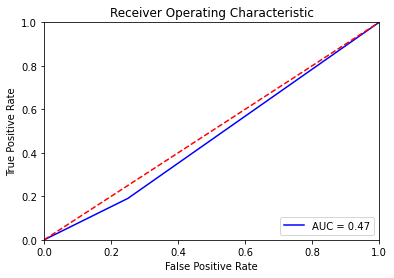

(160, 15) (160,) (41, 15) (41,)
     BasicSatLife  DroppedActInt  LifeEmpty  BoredOften  GoodSpirits  \
77              0              1          1           1            0   
147             0              1          1           1            0   
51              0              0          1           1            0   
157             1              0          1           1            1   
65              0              1          1           1            0   
..            ...            ...        ...         ...          ...   
74              0              1          1           1            0   
120             0              1          1           1            0   
191             0              1          1           1            0   
164             0              1          1           1            0   
57              0              1          1           1            0   

     AfraidBad  HappyMostTime  HelplessOften  PrefStayHome  MoreMemProb  \
77         0.0            0.

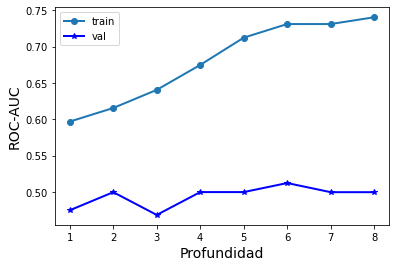

Mejor ROC-AUC en validación cruzada: 0.512
Mejor valor del hiperparámetro: {'max_depth': 6}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4634146341463415
[[14  6]
 [16  5]]
Sensibilidad y Accuracy 0.23809523809523808 0.4634146341463415


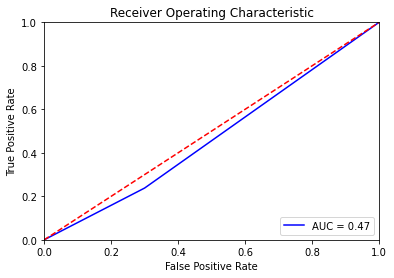

(160, 15) (160,) (41, 15) (41,)
     BasicSatLife  DroppedActInt  LifeEmpty  BoredOften  GoodSpirits  \
54              0              1          1           1            0   
28              0              0          1           0            0   
25              0              1          1           0            0   
21              1              0          0           1            1   
24              0              0          1           1            0   
..            ...            ...        ...         ...          ...   
130             0              1          1           1            0   
146             0              1          1           1            0   
29              0              0          0           0            1   
43              0              0          1           1            0   
92              0              1          1           1            0   

     AfraidBad  HappyMostTime  HelplessOften  PrefStayHome  MoreMemProb  \
54         1.0            0.

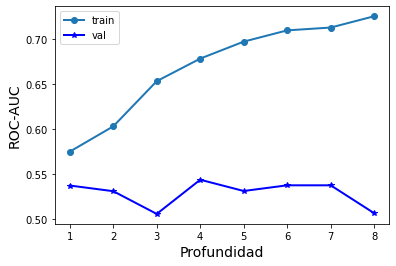

Mejor ROC-AUC en validación cruzada: 0.544
Mejor valor del hiperparámetro: {'max_depth': 4}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5121951219512195
[[15  5]
 [15  6]]
Sensibilidad y Accuracy 0.2857142857142857 0.5121951219512195


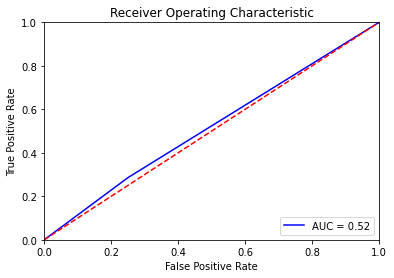

[0.09523809523809523, 0.8095238095238095, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857] [0.4878048780487805, 0.5365853658536586, 0.4634146341463415, 0.4634146341463415, 0.5121951219512195] [0.4976190476190477, 0.5297619047619048, 0.47023809523809523, 0.46904761904761905, 0.5178571428571428]


In [35]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[3])
    espe.append(b[4])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)


In [36]:
import statistics
media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...

print(media_sen_logarit, desviacion_estandar_sen_logarit)
model.append("DT")
mean.append(media_sen_logarit)
std.append(desviacion_estandar_sen_logarit)


media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...
print(media_log, desviacion_estandar_log)

model2.append("DT")
mean2.append(media_log)
std2.append(desviacion_estandar_log)


media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.4926829268292683 0.031800987342451945
0.4969047619047619 0.027414575628962403
0.3238095238095238 0.2805081233337741
0.67 0.24647515087732474


# Regresión Logística

In [37]:

from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

def regr_Logistica(X_train_norm, X_test_norm, Y_train, Y_test,seed):
    #scaler = StandardScaler() #normalizamos
    #scalerfit =  scaler.fit(X_train) #fit con los datos de train
    #X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    #X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 

    # Regresión logística
    regressor = LogisticRegression()

    # Entrenamos el modelo utilizando los datos de train
    regressor_lrm = regressor.fit(X_train_norm, Y_train)

    # Mostramos el intercepto
    print(regressor_lrm.intercept_)

    # Mostramos el valor de los coeficientes
    print(regressor_lrm.coef_)

    # Obtenemos el valor predicho para el conjunto de test
    y_pred_lrm = regressor_lrm.predict(X_test_norm)

    #  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lrm)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lrm).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lrm)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lrm, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lrm)
    print(f'Sensibilidad: {Sensibilidad}')
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lrm)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)
    
 #   accuracy.append(Accuracy)
#    sensibilidad.append(Sensibilidad)
    return (Accuracy, Sensibilidad, roc_auc)

(160, 15) (160,) (41, 15) (41,)
[-0.0867729]
[[-0.4303262  -0.8576249   0.16127331  0.40906891 -0.09639157 -0.07917757
   0.25811082  0.83335278  0.22077154 -0.9862409  -0.84618306  0.11176411
  -0.10618411  0.7555455  -0.58291304]]
[[17  3]
 [17  4]]
tn: 17, fp:3, fn:17, tp:4
Accuracy: 0.5121951219512195
              precision    recall  f1-score   support

Non-diabetic       0.50      0.85      0.63        20
    Diabetic       0.57      0.19      0.29        21

    accuracy                           0.51        41
   macro avg       0.54      0.52      0.46        41
weighted avg       0.54      0.51      0.45        41

Sensibilidad: 0.19047619047619047


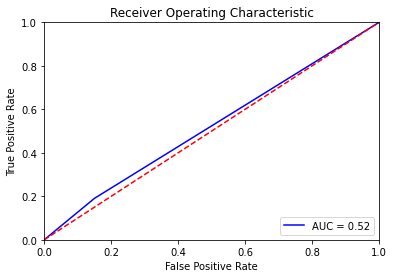

[0.19047619047619047]
(160, 15) (160,) (41, 15) (41,)
[-1.198858]
[[ 0.33261027 -0.6317787   0.60580452  0.70040197  0.11808535 -0.33469286
   0.02457769  0.64020425  0.33468584 -0.64153419 -0.34044527  0.13372617
   0.00830055  0.74446397 -0.33814042]]
[[ 7 13]
 [ 5 16]]
tn: 7, fp:13, fn:5, tp:16
Accuracy: 0.5609756097560976
              precision    recall  f1-score   support

Non-diabetic       0.58      0.35      0.44        20
    Diabetic       0.55      0.76      0.64        21

    accuracy                           0.56        41
   macro avg       0.57      0.56      0.54        41
weighted avg       0.57      0.56      0.54        41

Sensibilidad: 0.7619047619047619


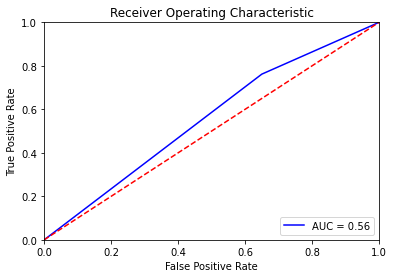

[0.19047619047619047, 0.7619047619047619]
(160, 15) (160,) (41, 15) (41,)
[-0.30239048]
[[ 0.10569996 -1.0267037   0.43795169  0.31155042 -0.10417118 -0.45175357
  -0.02456265  0.91229536  0.16853184 -0.5833819  -0.67970684  0.20993316
  -0.06062486  0.70921994 -0.44279252]]
[[14  6]
 [14  7]]
tn: 14, fp:6, fn:14, tp:7
Accuracy: 0.5121951219512195
              precision    recall  f1-score   support

Non-diabetic       0.50      0.70      0.58        20
    Diabetic       0.54      0.33      0.41        21

    accuracy                           0.51        41
   macro avg       0.52      0.52      0.50        41
weighted avg       0.52      0.51      0.50        41

Sensibilidad: 0.3333333333333333


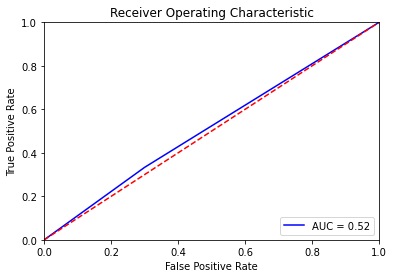

[0.19047619047619047, 0.7619047619047619, 0.3333333333333333]
(160, 15) (160,) (41, 15) (41,)
[0.40703006]
[[-0.32144521 -1.1501427   0.06642984  0.36597746 -0.26594404 -0.07798223
  -0.09218994  0.66828938  0.46367799 -0.67076748 -0.16446051  0.0485697
   0.33009279  0.35969319 -0.66179627]]
[[15  5]
 [13  8]]
tn: 15, fp:5, fn:13, tp:8
Accuracy: 0.5609756097560976
              precision    recall  f1-score   support

Non-diabetic       0.54      0.75      0.63        20
    Diabetic       0.62      0.38      0.47        21

    accuracy                           0.56        41
   macro avg       0.58      0.57      0.55        41
weighted avg       0.58      0.56      0.55        41

Sensibilidad: 0.38095238095238093


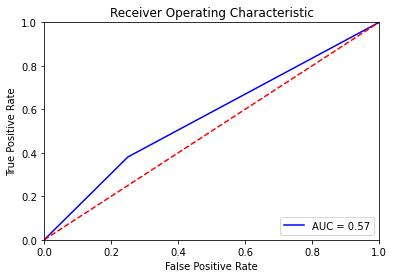

[0.19047619047619047, 0.7619047619047619, 0.3333333333333333, 0.38095238095238093]
(160, 15) (160,) (41, 15) (41,)
[0.0169263]
[[-0.26505878 -0.72731419  0.37482806  0.32401464 -0.12470856  0.14568918
  -0.03129558  0.53367609  0.49612114 -0.98164489 -0.19182418 -0.00395909
  -0.08769861  0.87110475 -1.02333619]]
[[ 8 12]
 [ 8 13]]
tn: 8, fp:12, fn:8, tp:13
Accuracy: 0.5121951219512195
              precision    recall  f1-score   support

Non-diabetic       0.50      0.40      0.44        20
    Diabetic       0.52      0.62      0.57        21

    accuracy                           0.51        41
   macro avg       0.51      0.51      0.50        41
weighted avg       0.51      0.51      0.51        41

Sensibilidad: 0.6190476190476191


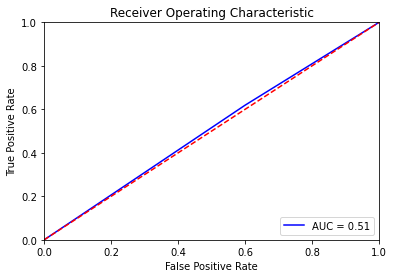

[0.19047619047619047, 0.7619047619047619, 0.3333333333333333, 0.38095238095238093, 0.6190476190476191]
[0.5121951219512195, 0.5609756097560976, 0.5121951219512195, 0.5609756097560976, 0.5121951219512195] [0.19047619047619047, 0.7619047619047619, 0.3333333333333333, 0.38095238095238093, 0.6190476190476191] [0.5202380952380952, 0.555952380952381, 0.5166666666666666, 0.5654761904761905, 0.5095238095238095]


In [38]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = regr_Logistica(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    print(accuracy)
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [39]:
import statistics
media_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_logarit = statistics.stdev(accuracy) # 5.164...


#model.append("Regr_Log")
#mean.append(media_logarit)
#std.append(desviacion_estandar_logarit)

# Regresión Logística Lasso

In [40]:
def reg_Lasso(X_train_norm, X_test_norm, Y_train, Y_test):
              

    #scaler = StandardScaler() #normalizamos
    #scalerfit =  scaler.fit(X_train) #fit con los datos de train
    #X_train_norm=scaler.transform(X_train) #balancear el train, normalizar en los métodos que hay relación entre variables y normalizamos tanto el conjunto de entrenamiento como el de test.
    #X_test_norm=scaler.transform(X_test)
    # NORMALIZANDO 
              
    from sklearn.linear_model import Lasso

    lasso = Lasso()

    logreg=LogisticRegression(solver='liblinear', penalty='l1')
    # Valores de alpha
    parameters = {"C":[1e-4, 1e-2, 1, 5, 10, 20]}

    # Grid search para lasso regression
    lasso_regression = GridSearchCV(logreg, parameters, scoring='accuracy', cv=5)

    # Entrenamos
    lasso_train=lasso_regression.fit(X_train_norm, Y_train)

    print(lasso_regression.best_params_)
    print(lasso_regression.best_score_)

    # Obtenemos la salida predicha
    y_pred_lasso = lasso_regression.predict(X_test_norm)
#  Calculamos la matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_lasso)
    print(cm)

    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lasso).ravel()
    print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')
    Especificidad = tn / (tn + fp)

    # Calcumos accuracy_score
    Accuracy=accuracy_score(Y_test, y_pred_lasso)
    print(f'Accuracy: {Accuracy}')

    target_names = ['Non-diabetic', 'Diabetic']
    print(classification_report(Y_test, y_pred_lasso, target_names=target_names))

    #Sensibilidad
    Sensibilidad=recall_score(Y_test, y_pred_lasso)
    print(f'Sensibilidad: {Sensibilidad}')
    #accuracy.append(Accuracy)
    #sensibilidad.append(Sensibilidad)
    roc = roc_auc_score(Y_test, y_pred_lasso)
    
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_lasso)
    roc_auc = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    #roc.append(roc_auc)

    return (Sensibilidad, Accuracy, roc_auc, roc, Especificidad)

(160, 15) (160,) (41, 15) (41,)
{'C': 1}
0.6
[[17  3]
 [17  4]]
tn: 17, fp:3, fn:17, tp:4
Accuracy: 0.5121951219512195
              precision    recall  f1-score   support

Non-diabetic       0.50      0.85      0.63        20
    Diabetic       0.57      0.19      0.29        21

    accuracy                           0.51        41
   macro avg       0.54      0.52      0.46        41
weighted avg       0.54      0.51      0.45        41

Sensibilidad: 0.19047619047619047


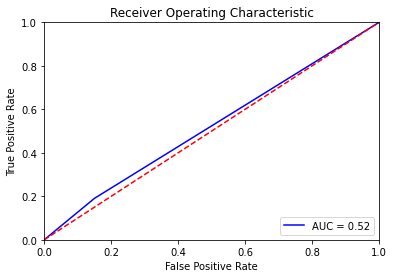

(160, 15) (160,) (41, 15) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


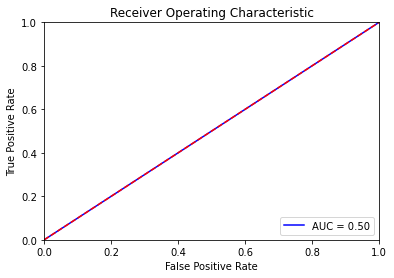

(160, 15) (160,) (41, 15) (41,)
{'C': 1}
0.5125
[[14  6]
 [14  7]]
tn: 14, fp:6, fn:14, tp:7
Accuracy: 0.5121951219512195
              precision    recall  f1-score   support

Non-diabetic       0.50      0.70      0.58        20
    Diabetic       0.54      0.33      0.41        21

    accuracy                           0.51        41
   macro avg       0.52      0.52      0.50        41
weighted avg       0.52      0.51      0.50        41

Sensibilidad: 0.3333333333333333


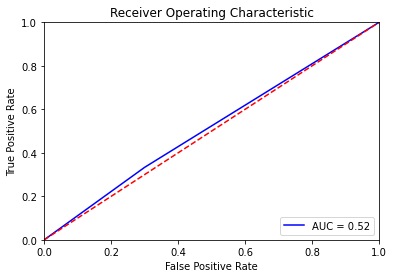

(160, 15) (160,) (41, 15) (41,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


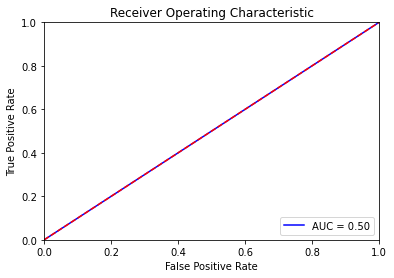

(160, 15) (160,) (41, 15) (41,)
{'C': 1}
0.50625
[[13  7]
 [12  9]]
tn: 13, fp:7, fn:12, tp:9
Accuracy: 0.5365853658536586
              precision    recall  f1-score   support

Non-diabetic       0.52      0.65      0.58        20
    Diabetic       0.56      0.43      0.49        21

    accuracy                           0.54        41
   macro avg       0.54      0.54      0.53        41
weighted avg       0.54      0.54      0.53        41

Sensibilidad: 0.42857142857142855


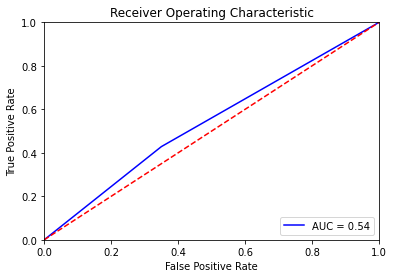

[0.19047619047619047, 0.0, 0.3333333333333333, 0.0, 0.42857142857142855] [0.5121951219512195, 0.4878048780487805, 0.5121951219512195, 0.4878048780487805, 0.5365853658536586] [0.5202380952380952, 0.5, 0.5166666666666666, 0.5, 0.5392857142857143]


In [41]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[3])
    espe.append(b[4])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(sensi, accuracy, roc)

In [42]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model.append("LASSO")
mean.append(media_lasso)
std.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2.append("LASSO")
mean2.append(media_lasso2)
std2.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)

media_knn34 = statistics.mean(espe) # 7
desviacion_estandar_knn34 = statistics.stdev(espe) # 5.164...

print(media_knn34, desviacion_estandar_knn34)

0.5073170731707317 0.020406342110587228
0.5152380952380952 0.016353347449042814
0.19047619047619047 0.1934294858246657
0.84 0.16355427233796127


In [43]:
def plot_mean_std_metric(df_metrics, lims, metric_name='', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [44]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model
df_metrics["mean"] = mean
df_metrics["std"] = std

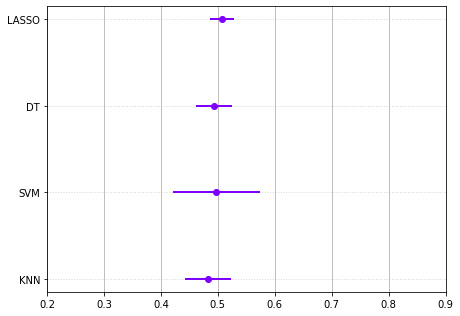

In [45]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure='', flag_save_figure=True)



In [46]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2
df_metrics2["mean"] = mean2
df_metrics2["std"] = std2

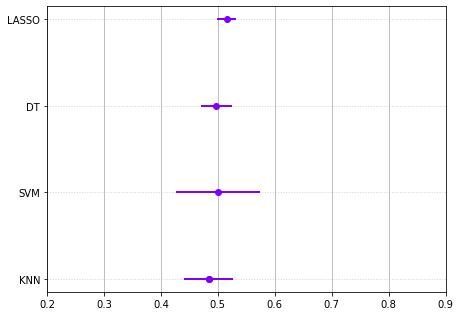

In [47]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)

# Feature Selection ExtraTreesClassifier

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

def extraTree(X_train, X_test, Y_train, Y_test):
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    # Como en árboles, no es necesario que las características estén normalizadas
    # Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

    forest.fit(X_train, Y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Muestra el ranking en el ordenamiento
    print("Ranking de Características:")

    for f in range(X_train.shape[1]):
        print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Importancia de las características")
    plt.bar(range(X_train.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), indices)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()
    return indices[0:5]

(160, 15) (160,) (41, 15) (41,)
Ranking de Características:
1. Característica 9 (0.161390)
2. Característica 1 (0.107063)
3. Característica 5 (0.093023)
4. Característica 3 (0.090063)
5. Característica 12 (0.088038)
6. Característica 7 (0.075469)
7. Característica 0 (0.058085)
8. Característica 8 (0.056172)
9. Característica 10 (0.054174)
10. Característica 4 (0.042075)
11. Característica 6 (0.040576)
12. Característica 11 (0.038942)
13. Característica 13 (0.035184)
14. Característica 2 (0.033653)
15. Característica 14 (0.026093)


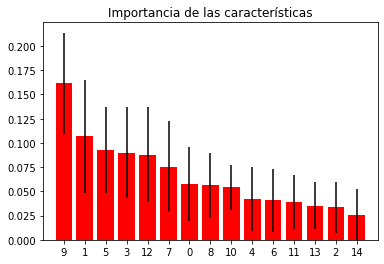

(160, 15) (160,) (41, 15) (41,)
Ranking de Características:
1. Característica 9 (0.120610)
2. Característica 12 (0.107972)
3. Característica 3 (0.103015)
4. Característica 7 (0.099755)
5. Característica 8 (0.093690)
6. Característica 1 (0.092011)
7. Característica 5 (0.067416)
8. Característica 0 (0.052342)
9. Característica 6 (0.048984)
10. Característica 4 (0.045164)
11. Característica 2 (0.039411)
12. Característica 11 (0.037034)
13. Característica 13 (0.032292)
14. Característica 10 (0.030969)
15. Característica 14 (0.029336)


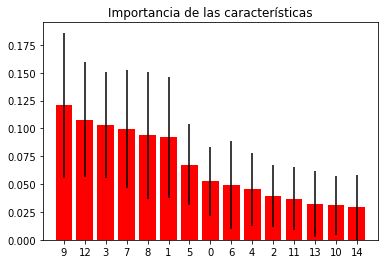

(160, 15) (160,) (41, 15) (41,)
Ranking de Características:
1. Característica 1 (0.117505)
2. Característica 9 (0.109524)
3. Característica 5 (0.108486)
4. Característica 8 (0.095572)
5. Característica 7 (0.092239)
6. Característica 12 (0.088647)
7. Característica 3 (0.065925)
8. Característica 0 (0.051799)
9. Característica 4 (0.047337)
10. Característica 11 (0.042957)
11. Característica 2 (0.041643)
12. Característica 6 (0.038843)
13. Característica 10 (0.038753)
14. Característica 13 (0.038595)
15. Característica 14 (0.022174)


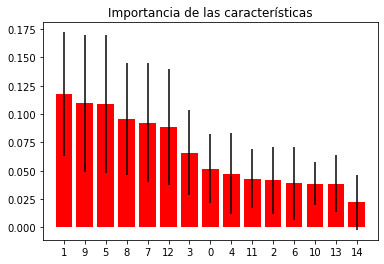

(160, 15) (160,) (41, 15) (41,)
Ranking de Características:
1. Característica 1 (0.154846)
2. Característica 9 (0.117988)
3. Característica 7 (0.105004)
4. Característica 12 (0.089903)
5. Característica 5 (0.083713)
6. Característica 8 (0.082654)
7. Característica 3 (0.080664)
8. Característica 0 (0.050218)
9. Característica 11 (0.045385)
10. Característica 6 (0.042674)
11. Característica 10 (0.040452)
12. Característica 4 (0.039872)
13. Característica 2 (0.029372)
14. Característica 14 (0.023650)
15. Característica 13 (0.013606)


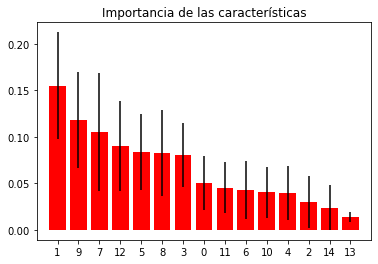

(160, 15) (160,) (41, 15) (41,)
Ranking de Características:
1. Característica 9 (0.163822)
2. Característica 12 (0.117818)
3. Característica 1 (0.094968)
4. Característica 7 (0.091403)
5. Característica 5 (0.088401)
6. Característica 8 (0.079089)
7. Característica 3 (0.070886)
8. Característica 0 (0.051268)
9. Característica 2 (0.043192)
10. Característica 13 (0.036683)
11. Característica 6 (0.035854)
12. Característica 14 (0.035345)
13. Característica 11 (0.031956)
14. Característica 4 (0.031042)
15. Característica 10 (0.028271)


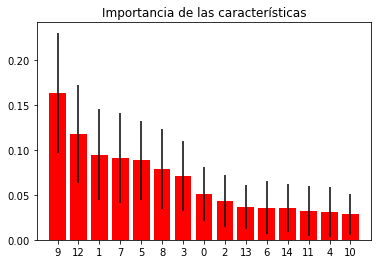

[array([ 9,  1,  5,  3, 12], dtype=int64), array([ 9, 12,  3,  7,  8], dtype=int64), array([1, 9, 5, 8, 7], dtype=int64), array([ 1,  9,  7, 12,  5], dtype=int64), array([ 9, 12,  1,  7,  5], dtype=int64)]


In [49]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = extraTree(X_train, X_test, Y_train, Y_test)
    indices_extr .append(b)
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

#  Selección de características con el estadístico mutual information

In [50]:
# Importamos las bibliotecas necesarias 
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
# Scikit-learn proporciona la clase SelectKBest, que al usarse en combinación con distintos tests estadísticos, permite seleccionar una serie de características

def chisquare(X_train, X_test, Y_train, Y_test, data_input_new):
    # como tenemos 9 características, evaluamos el estadístico chi2 para las 9, y posteriormente ordenamos los valores
    bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
    fit = bestfeatures.fit(data_input_new, data_output)
    print(fit.scores_)

    names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11',"f12" 'f13', 'f14', 'f15']
    data_input_new2 = pd.DataFrame(data_input_new, columns = names)

    for element,name in zip(data_input_new.columns, names):
        print(name,element)

    array = data_input_new.values
    data_input_array = array [:,0:27]
    print(data_input_array.shape)

    pd_extendido = pd.DataFrame(data_input_array, columns=names)

    df = pd.DataFrame({'Nombre_feat':pd_extendido.columns, 'valores':fit.scores_})
    df_ordenado = df.sort_values('valores', ascending=False)
    ax = df_ordenado.plot.bar(x='Nombre_feat', y='valores', rot=0)
    plt.title("Ordenamiento de características con el estadístico chi cuadrado y las características originales")


(160, 15) (160,) (41, 15) (41,)
[0.         0.         0.         0.03081573 0.         0.06799306
 0.02550963 0.         0.         0.04483007 0.         0.
 0.         0.04526566 0.        ]
f0 BasicSatLife
f1 DroppedActInt
f2 LifeEmpty
f3 BoredOften
f4 GoodSpirits
f5 AfraidBad
f6 HappyMostTime
f7 HelplessOften
f8 PrefStayHome
f9 MoreMemProb
f10 WondAlive
f11 Worthless
f12f13 FullEnergy
f14 HopelessSit
f15 MostPplBetterOff
(201, 15)
(160, 15) (160,) (41, 15) (41,)
[0.         0.         0.03328744 0.         0.07001163 0.
 0.         0.         0.         0.07206529 0.03929061 0.
 0.         0.03853781 0.        ]
f0 BasicSatLife
f1 DroppedActInt
f2 LifeEmpty
f3 BoredOften
f4 GoodSpirits
f5 AfraidBad
f6 HappyMostTime
f7 HelplessOften
f8 PrefStayHome
f9 MoreMemProb
f10 WondAlive
f11 Worthless
f12f13 FullEnergy
f14 HopelessSit
f15 MostPplBetterOff
(201, 15)
(160, 15) (160,) (41, 15) (41,)
[0.         0.06476325 0.         0.         0.         0.00120403
 0.         0.         0.      

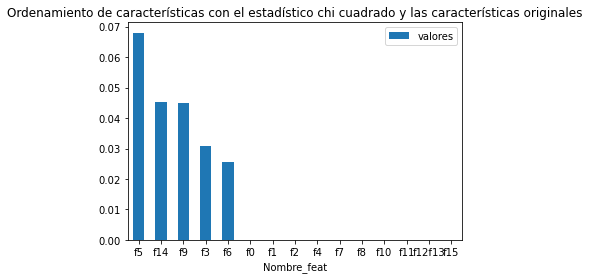

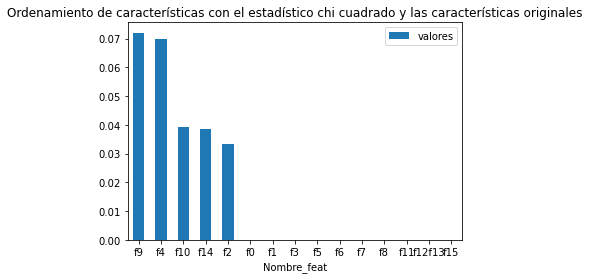

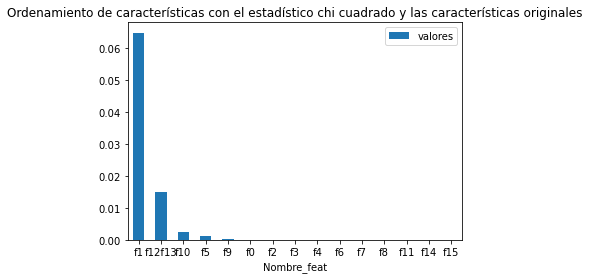

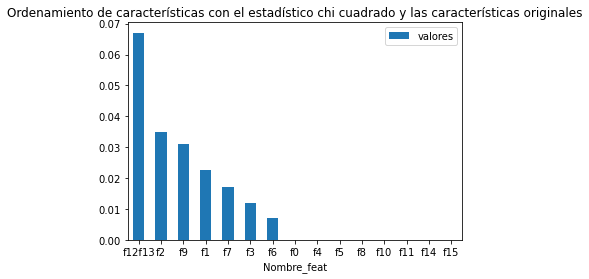

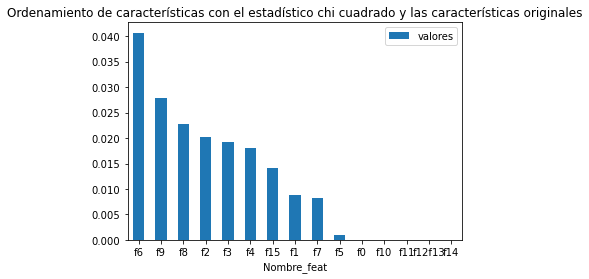

In [51]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = chisquare(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    
    # ordenamos en sentido descendente (de mayor a menor), y lo representamos
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

## Selección de características. Métodos embedded

In [52]:
from matplotlib import pyplot
def embedded(X_train, X_test, Y_train, Y_test, data_input_new):
    # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
    param_grid = {'max_depth': range(1,6)}
    profundidad_grid = np.array(range(1,6))


    grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = 'roc_auc', cv=3, return_train_score=True)
    grid_arbol_clasif.fit(X_train, Y_train)
    print(grid_arbol_clasif.best_params_)

    perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
    perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

    plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
    plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
    plt.xlabel('Profundidad',fontsize=14)
    plt.ylabel('ROC-AUC',fontsize=14)
    plt.legend()
    plt.show()

    print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
    print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

    # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
    grid_arbol_clasif.get_params()

    # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
    Arbol_clasif_all = grid_arbol_clasif.best_estimator_
    modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
    importance_arbol = modelo_arbol_clasif.feature_importances_
    pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
    pyplot.show()

    # 5. Se representa gráficamente el modelo de clasificación
    from sklearn.tree import export_graphviz
    #from sklearn.externals.six import StringIO  
    from six import StringIO
    from IPython.display import Image  
    import pydotplus

    dot_data = StringIO()
    export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = data_input_new.columns[0:],class_names=['y-diab','n-diab'])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('Tree_Clasif_all.png')
    Image(graph.create_png())

(160, 15) (160,) (41, 15) (41,)
{'max_depth': 2}


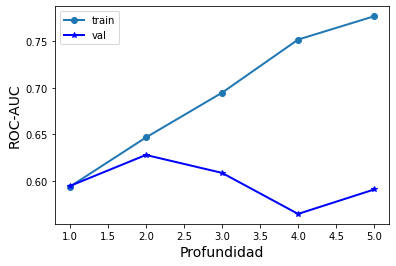

Mejor ROC-AUC en validación cruzada: 0.628
Mejor valor del hiperparámetro: {'max_depth': 2}


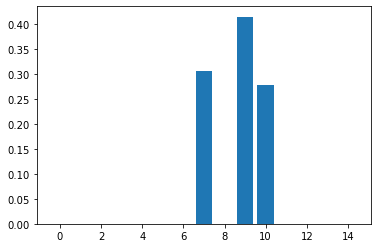

(160, 15) (160,) (41, 15) (41,)
{'max_depth': 4}


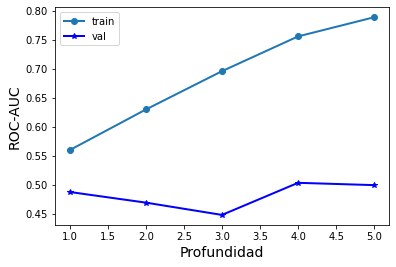

Mejor ROC-AUC en validación cruzada: 0.503
Mejor valor del hiperparámetro: {'max_depth': 4}


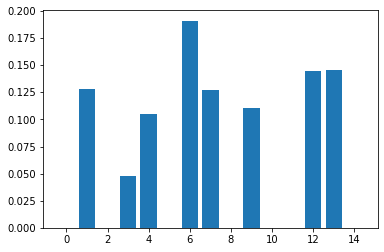

(160, 15) (160,) (41, 15) (41,)
{'max_depth': 2}


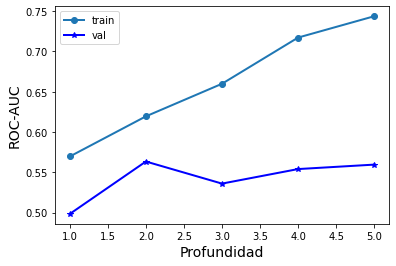

Mejor ROC-AUC en validación cruzada: 0.563
Mejor valor del hiperparámetro: {'max_depth': 2}


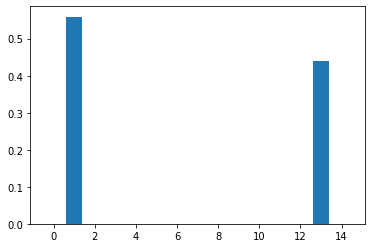

(160, 15) (160,) (41, 15) (41,)
{'max_depth': 5}


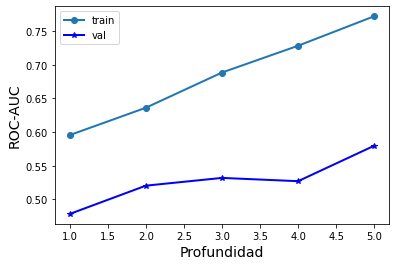

Mejor ROC-AUC en validación cruzada: 0.580
Mejor valor del hiperparámetro: {'max_depth': 5}


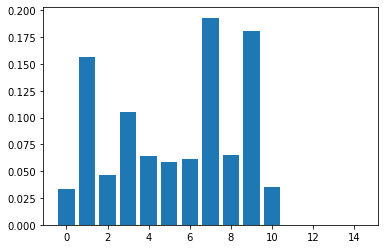

(160, 15) (160,) (41, 15) (41,)
{'max_depth': 5}


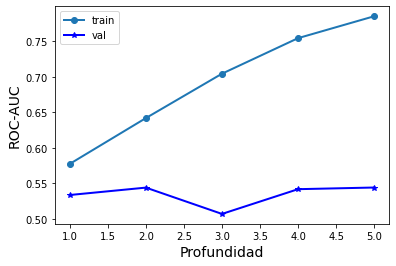

Mejor ROC-AUC en validación cruzada: 0.544
Mejor valor del hiperparámetro: {'max_depth': 5}


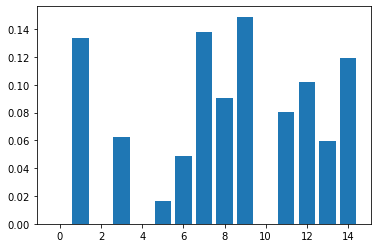

[None, None, None, None, None]


In [53]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
indices_extr = []
accuracy = []
roc = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, stratify= data_output, test_size=0.2, random_state=i)
    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
    list_x_train.append(X_train)
    list_y_train.append(Y_train)
    list_y_test.append(Y_test)
    list_x_test.append(X_test)
    
    b = embedded(X_train, X_test, Y_train, Y_test, data_input)
    indices_extr .append(b)
    
    
    #accuracy.append(b[1])
    #roc.append(b[2])
    #normalización
    #modelosvm, train y test
    #prestaciones
print(indices_extr )

# Método Boostrap

In [54]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv('df_var_importance_boostrap_{}.csv'.format(generic_name))


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [55]:
df_data = data1.rename(columns = {"BCaseControlStatus":"label"})

In [56]:
data_new2 = df_data.replace("Case",1).replace("Control",0)

In [57]:
df_data = data_new2.drop(columns = ["GeriDepressScale1tDone","RecID_x","RecID_y", "PtID"])

In [58]:
df_data.head()

,label,GeriDepressScaleCompDaysFromEnroll,BasicSatLife,DroppedActInt,LifeEmpty,BoredOften,GoodSpirits,AfraidBad,HappyMostTime,HelplessOften,PrefStayHome,MoreMemProb,WondAlive,Worthless,FullEnergy,HopelessSit,MostPplBetterOff
0,1,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,1,1,1
1,0,0,0,1,0,0,0,0.0,0.0,0,1.0,0,1.0,0,0,1,0
2,1,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1
3,0,0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,0,0,1,1
4,1,11,0,0,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1


In [59]:
data_input.head()

,BasicSatLife,DroppedActInt,LifeEmpty,BoredOften,GoodSpirits,AfraidBad,HappyMostTime,HelplessOften,PrefStayHome,MoreMemProb,WondAlive,Worthless,FullEnergy,HopelessSit,MostPplBetterOff
0,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,1,1,1
1,0,1,0,0,0,0.0,0.0,0,1.0,0,1.0,0,0,1,0
2,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1
3,0,1,1,1,0,1.0,0.0,1,1.0,1,0.0,0,0,1,1
4,0,0,1,1,0,1.0,0.0,1,1.0,1,0.0,1,0,1,1


In [60]:
compute_boostrap(df_data, data_input.columns, 'label', 'importance_bootstrap', flag_save_importance=True)

sample size:  160
     BasicSatLife  label
97              1      1
117             0      1
59              0      1
35              0      1
165             0      1
..            ...    ...
24              0      1
3               0      0
170             0      1
49              0      1
149             0      0

[160 rows x 2 columns]
     BasicSatLife  label
175             0      0
33              0      1
200             0      0
187             0      0
22              0      0
..            ...    ...
185             0      0
168             1      1
7               0      1
142             0      1
44              0      0

[160 rows x 2 columns]
     BasicSatLife  label
117             0      1
9               0      1
17              0      0
20              0      0
125             0      1
..            ...    ...
156             1      0
30              0      1
76              0      1
132             0      1
118             0      1

[160 rows x 2 columns]
     Basic

[160 rows x 2 columns]
     DroppedActInt  label
129              1      0
172              0      1
25               1      0
123              1      1
36               1      0
..             ...    ...
77               1      1
130              1      1
52               1      1
88               1      1
154              1      1

[160 rows x 2 columns]
     DroppedActInt  label
43               0      0
136              1      0
189              1      0
112              0      1
139              0      1
..             ...    ...
200              1      0
198              1      0
159              1      0
102              1      0
168              1      1

[160 rows x 2 columns]
     DroppedActInt  label
110              1      0
49               1      1
3                1      0
67               1      0
135              1      0
..             ...    ...
185              1      0
80               0      1
88               1      1
152              1      0
193              1 

[160 rows x 2 columns]
     BoredOften  label
117           1      1
134           1      1
147           1      0
143           0      0
89            1      1
..          ...    ...
192           1      1
140           1      0
129           1      0
63            1      1
135           1      0

[160 rows x 2 columns]
     BoredOften  label
156           1      0
187           1      0
23            1      1
193           1      1
36            0      0
..          ...    ...
15            1      0
14            1      0
37            1      1
143           0      0
83            1      0

[160 rows x 2 columns]
     BoredOften  label
101           1      1
127           1      1
36            0      0
79            1      1
169           1      0
..          ...    ...
82            1      1
124           1      1
64            1      1
128           1      0
86            1      1

[160 rows x 2 columns]
     BoredOften  label
76            1      1
7             1      1
94      

     AfraidBad  label
104        0.0      0
126        1.0      0
96         0.0      0
101        1.0      1
130        1.0      1
..         ...    ...
35         1.0      1
52         0.0      1
39         1.0      0
167        1.0      0
112        0.0      1

[160 rows x 2 columns]
     AfraidBad  label
139        1.0      1
123        1.0      1
28         0.0      0
133        1.0      0
136        1.0      0
..         ...    ...
96         0.0      0
88         1.0      1
23         1.0      1
163        1.0      1
63         1.0      1

[160 rows x 2 columns]
     AfraidBad  label
171        1.0      1
88         1.0      1
103        1.0      0
182        1.0      0
73         1.0      1
..         ...    ...
126        1.0      0
167        1.0      0
9          1.0      1
92         1.0      0
29         1.0      0

[160 rows x 2 columns]
     AfraidBad  label
23         1.0      1
96         0.0      0
52         0.0      1
147        1.0      0
168        0.0      1
..  

[160 rows x 2 columns]
     HappyMostTime  label
175            0.0      0
50             0.0      0
173            0.0      0
26             0.0      0
3              0.0      0
..             ...    ...
136            0.0      0
49             0.0      1
183            0.0      1
21             1.0      0
10             0.0      0

[160 rows x 2 columns]
     HappyMostTime  label
121            0.0      0
103            0.0      0
198            0.0      0
195            0.0      0
67             0.0      0
..             ...    ...
60             1.0      0
77             0.0      1
136            0.0      0
177            0.0      0
168            1.0      1

[160 rows x 2 columns]
     HappyMostTime  label
96             0.0      0
133            0.0      0
107            0.0      0
177            0.0      0
84             0.0      0
..             ...    ...
41             0.0      1
58             0.0      1
112            1.0      1
0              0.0      1
71             1.0 

[160 rows x 2 columns]
     PrefStayHome  label
76            1.0      1
7             1.0      1
94            0.0      1
188           1.0      1
118           1.0      1
..            ...    ...
93            1.0      1
121           1.0      0
10            1.0      0
127           0.0      1
87            0.0      0

[160 rows x 2 columns]
     PrefStayHome  label
55            1.0      0
97            0.0      1
101           1.0      1
180           1.0      0
133           1.0      0
..            ...    ...
69            1.0      0
35            0.0      1
103           0.0      0
88            0.0      1
33            0.0      1

[160 rows x 2 columns]
     PrefStayHome  label
120           1.0      1
91            1.0      1
102           0.0      0
83            1.0      0
30            1.0      1
..            ...    ...
18            1.0      0
181           1.0      0
64            1.0      1
133           1.0      0
35            0.0      1

[160 rows x 2 columns]
     

     WondAlive  label
139        0.0      1
123        0.0      1
28         0.0      0
133        0.0      0
136        0.0      0
..         ...    ...
96         0.0      0
88         0.0      1
23         0.0      1
163        0.0      1
63         0.0      1

[160 rows x 2 columns]
     WondAlive  label
171        0.0      1
88         0.0      1
103        0.0      0
182        0.0      0
73         0.0      1
..         ...    ...
126        0.0      0
167        0.0      0
9          0.0      1
92         0.0      0
29         0.0      0

[160 rows x 2 columns]
     WondAlive  label
23         0.0      1
96         0.0      0
52         0.0      1
147        0.0      0
168        1.0      1
..         ...    ...
10         0.0      0
118        0.0      1
58         0.0      1
66         0.0      0
171        0.0      1

[160 rows x 2 columns]
     WondAlive  label
39         0.0      0
34         0.0      1
61         0.0      0
54         0.0      1
74         0.0      1
..  

[160 rows x 2 columns]
     Worthless  label
121          1      0
103          1      0
198          1      0
195          1      0
67           1      0
..         ...    ...
60           1      0
77           1      1
136          1      0
177          1      0
168          1      1

[160 rows x 2 columns]
     Worthless  label
96           1      0
133          1      0
107          1      0
177          1      0
84           1      0
..         ...    ...
41           1      1
58           1      1
112          1      1
0            1      1
71           1      0

[160 rows x 2 columns]
     Worthless  label
165          0      1
53           1      0
37           1      1
115          1      0
22           1      0
..         ...    ...
137          1      1
89           1      1
85           1      1
23           1      1
75           1      1

[160 rows x 2 columns]
     Worthless  label
68           1      0
57           1      1
14           1      0
156          0      0
151

[160 rows x 2 columns]
     HopelessSit  label
175            1      0
50             1      0
173            1      0
26             1      0
3              1      0
..           ...    ...
136            1      0
49             1      1
183            1      1
21             1      0
10             1      0

[160 rows x 2 columns]
     HopelessSit  label
121            1      0
103            1      0
198            1      0
195            1      0
67             1      0
..           ...    ...
60             1      0
77             1      1
136            1      0
177            1      0
168            1      1

[160 rows x 2 columns]
     HopelessSit  label
96             1      0
133            1      0
107            1      0
177            1      0
84             1      0
..           ...    ...
41             1      1
58             1      1
112            1      1
0              1      1
71             1      0

[160 rows x 2 columns]
     HopelessSit  label
165            1 

# Métodos con las características más importantes

In [61]:
data_input_FS = data_input[["DroppedActInt", "MoreMemProb", "WondAlive", "HelplessOften", "BoredOften", "AfraidBad","PrefStayHome", "FullEnergy"]]
data_input_FS2 = data_input[["DroppedActInt", "MoreMemProb", "WondAlive", "HelplessOften", "WondAlive", "HopelessSit", "PrefStayHome", "FullEnergy"]]
data_input_newtodas1 = data_input[["BasicSatLife", "LifeEmpty", "GoodSpirits", "HappyMostTime", "PrefStayHome", "MoreMemProb", "WondAlive", "Worthless", "HopelessSit", "MostPplBetterOff"]]
data_input_newtodas = data_input[[ "LifeEmpty", "PrefStayHome", "MoreMemProb", "WondAlive", "HopelessSit"]]
data_input_FS3 = data_input[["MoreMemProb", "WondAlive", "HelplessOften", "WondAlive"]]
       
data_input_FS4 = data_input[["LifeEmpty", "PrefStayHome", "MoreMemProb", "WondAlive", "HopelessSit"]]

In [62]:
data_input_FS4.to_excel("BGeriDepressFS.xlsx")


# KNN

In [63]:
model_FS   =[]
mean_FS = []
std_FS = []

model2_FS   =[]
mean2_FS = []
std2_FS = []

(160, 5) (160,) (41, 5) (41,)


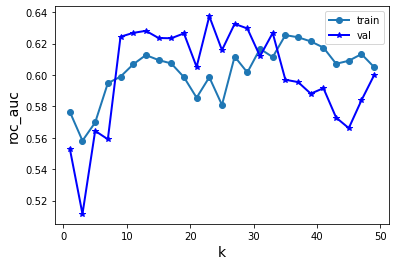

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.637
Valor correspondiente para el hiperparámetro: {'n_neighbors': 23}
0.4878048780487805
[[17  3]
 [18  3]]
Sensibilidad y Accuracy 0.14285714285714285 0.4878048780487805


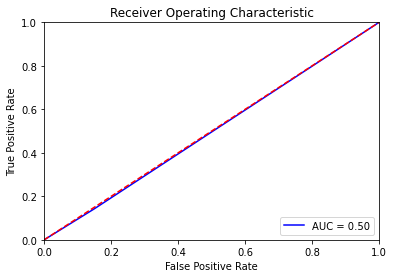

(160, 5) (160,) (41, 5) (41,)


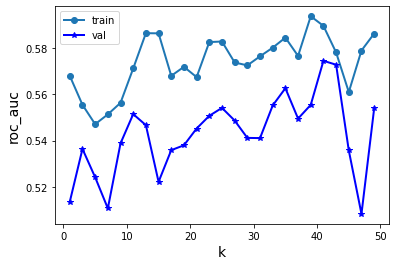

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
Valor correspondiente para el hiperparámetro: {'n_neighbors': 41}
0.6097560975609756
[[ 5 15]
 [ 1 20]]
Sensibilidad y Accuracy 0.9523809523809523 0.6097560975609756


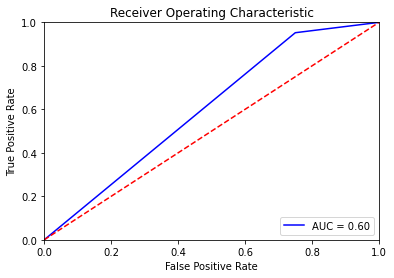

(160, 5) (160,) (41, 5) (41,)


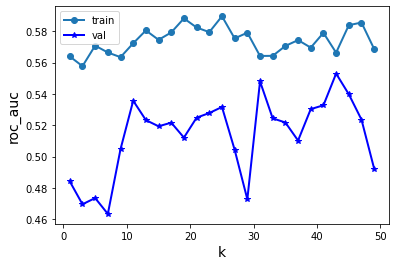

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.553
Valor correspondiente para el hiperparámetro: {'n_neighbors': 43}
0.4634146341463415
[[12  8]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.4634146341463415


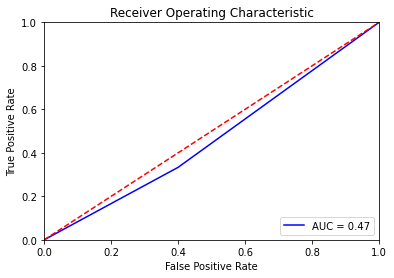

(160, 5) (160,) (41, 5) (41,)


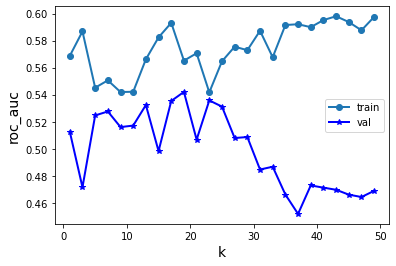

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.542
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.6097560975609756
[[ 7 13]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.6097560975609756


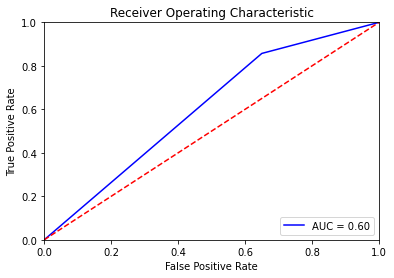

(160, 5) (160,) (41, 5) (41,)


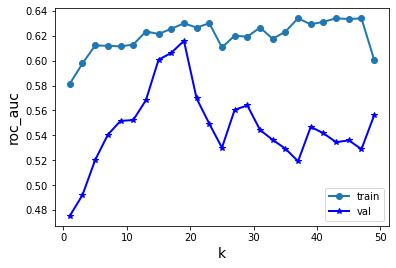

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.616
Valor correspondiente para el hiperparámetro: {'n_neighbors': 19}
0.5609756097560976
[[ 5 15]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.5609756097560976


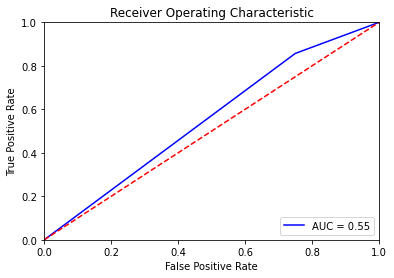

[0.14285714285714285, 0.9523809523809523, 0.3333333333333333, 0.8571428571428571, 0.8571428571428571] [0.4878048780487805, 0.6097560975609756, 0.4634146341463415, 0.6097560975609756, 0.5609756097560976] [0.4964285714285714, 0.6011904761904762, 0.4666666666666666, 0.6035714285714286, 0.5535714285714286]


In [64]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS4, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = knn(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[4])



print(sensi, accuracy, roc)

In [65]:
import statistics
media_knn = statistics.mean(accuracy) # 7
desviacion_estandar_knn = statistics.stdev(accuracy) # 5.164...


model_FS.append("KNN")
mean_FS.append(media_knn)
std_FS.append(desviacion_estandar_knn)
print(media_knn, desviacion_estandar_knn)



media_knn2 = statistics.mean(roc) # 7
desviacion_estandar_knn2 = statistics.stdev(roc) # 5.164...


model2_FS.append("KNN")
mean2_FS.append(media_knn2)
std2_FS.append(desviacion_estandar_knn2)
print(media_knn2, desviacion_estandar_knn2)
media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)


0.5463414634146342 0.06811824411594604
0.5442857142857143 0.061551188070048425
0.45999999999999996 0.2607680962081059


In [66]:
media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)

0.6285714285714286 0.36483773922624674


# SVC 

(160, 5) (160,) (41, 5) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.4878048780487805
[[18  2]
 [19  2]]
Sensibilidad y Accuracy 0.09523809523809523 0.4878048780487805


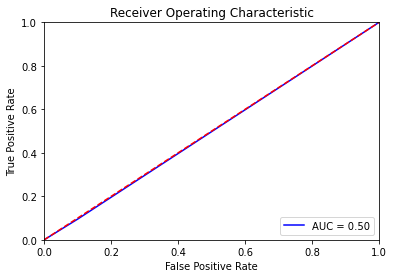

(160, 5) (160,) (41, 5) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.6097560975609756
[[ 5 15]
 [ 1 20]]
Sensibilidad y Accuracy 0.9523809523809523 0.6097560975609756


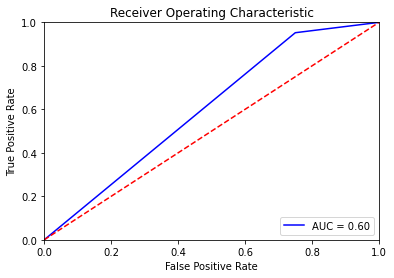

(160, 5) (160,) (41, 5) (41,)
Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.490
0.6341463414634146
[[19  1]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.6341463414634146


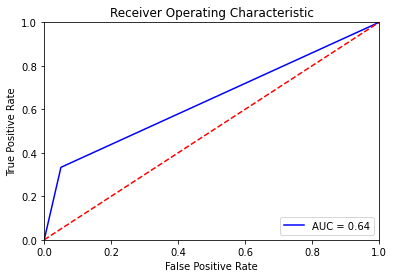

(160, 5) (160,) (41, 5) (41,)
Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5853658536585366
[[17  3]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5853658536585366


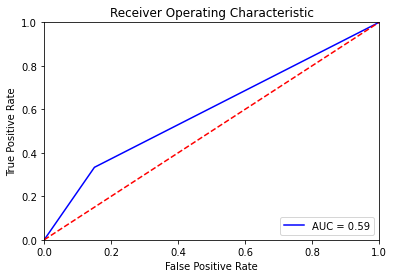

(160, 5) (160,) (41, 5) (41,)
Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.608
0.6097560975609756
[[ 7 13]
 [ 3 18]]
Sensibilidad y Accuracy 0.8571428571428571 0.6097560975609756


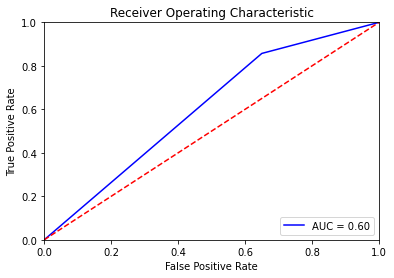

In [67]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS4, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = svc(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[4])

In [68]:
import statistics
media_svc = statistics.mean(accuracy) # 7
desviacion_svc = statistics.stdev(accuracy) # 5.164...


model_FS.append("SVM")
mean_FS.append(media_svc)
std_FS.append(desviacion_svc)
print(media_svc, desviacion_svc)


media_svc2 = statistics.mean(roc) # 7
desviacion_estandar_svc2 = statistics.stdev(roc) # 5.164...
print(media_svc2, desviacion_estandar_svc2 )


model2_FS.append("SVM")
mean2_FS.append(media_svc2)
std2_FS.append(desviacion_estandar_svc2)

media_knn3 = statistics.mean(sensi) # 7
desviacion_estandar_knn3 = statistics.stdev(sensi) # 5.164...

print(media_knn3, desviacion_estandar_knn3)
media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.5853658536585366 0.05720019219296865
0.5871428571428572 0.05356084551550318
0.5142857142857142 0.37100097487204675
0.66 0.33241540277189324


# Decision Tree

(160, 5) (160,) (41, 5) (41,)
     LifeEmpty  PrefStayHome  MoreMemProb  WondAlive  HopelessSit
26           1           0.0            1        0.0            1
1            0           1.0            0        1.0            1
162          1           0.0            1        0.0            1
25           1           1.0            1        0.0            1
94           0           0.0            0        0.0            1
..         ...           ...          ...        ...          ...
53           1           1.0            1        0.0            0
115          1           0.0            1        1.0            1
178          1           0.0            1        0.0            1
99           0           0.0            1        0.0            1
119          1           1.0            1        0.0            1

[160 rows x 5 columns]
{'max_depth': 2}


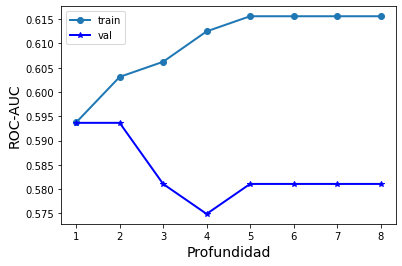

Mejor ROC-AUC en validación cruzada: 0.594
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 0, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=0), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.4634146341463415
[[18  2]
 [20  1]]
Sensibilidad y Accuracy 0.047619047619047616 0.4634146341463415


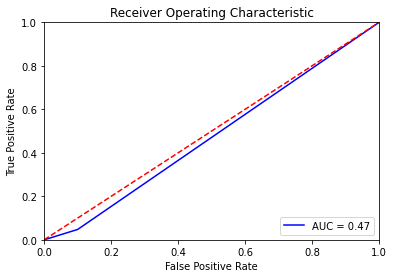

(160, 5) (160,) (41, 5) (41,)
     LifeEmpty  PrefStayHome  MoreMemProb  WondAlive  HopelessSit
150          1           1.0            1        0.0            1
197          1           1.0            1        0.0            1
58           1           1.0            0        0.0            1
161          1           1.0            1        0.0            1
86           1           1.0            0        0.0            1
..         ...           ...          ...        ...          ...
107          1           0.0            1        0.0            1
49           1           1.0            1        0.0            1
114          1           1.0            1        0.0            1
128          1           1.0            1        0.0            1
50           1           1.0            1        0.0            1

[160 rows x 5 columns]
{'max_depth': 2}


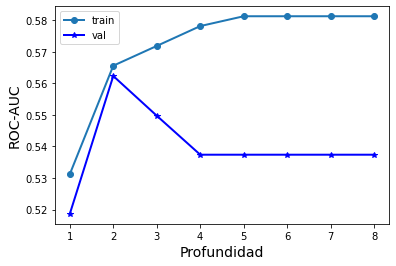

Mejor ROC-AUC en validación cruzada: 0.562
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.6341463414634146
[[17  3]
 [12  9]]
Sensibilidad y Accuracy 0.42857142857142855 0.6341463414634146


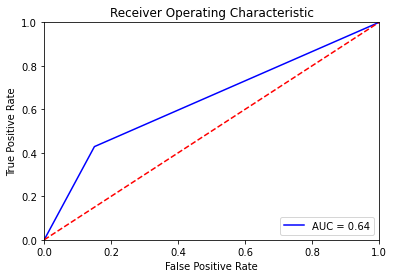

(160, 5) (160,) (41, 5) (41,)
     LifeEmpty  PrefStayHome  MoreMemProb  WondAlive  HopelessSit
131          1           0.0            0        0.0            1
30           1           1.0            1        0.0            1
168          1           0.0            0        1.0            1
154          1           0.0            1        0.0            1
28           1           0.0            0        0.0            1
..         ...           ...          ...        ...          ...
46           1           0.0            1        0.0            1
5            1           1.0            1        0.0            1
58           1           1.0            0        0.0            1
151          1           1.0            0        0.0            1
183          1           1.0            1        0.0            1

[160 rows x 5 columns]
{'max_depth': 3}


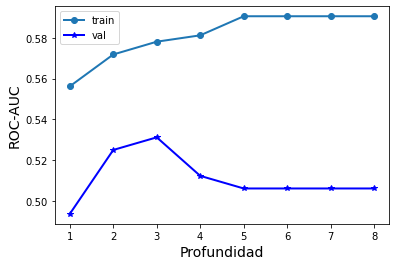

Mejor ROC-AUC en validación cruzada: 0.531
Mejor valor del hiperparámetro: {'max_depth': 3}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 2, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=2), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5853658536585366
[[19  1]
 [16  5]]
Sensibilidad y Accuracy 0.23809523809523808 0.5853658536585366


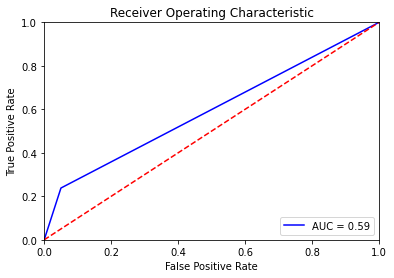

(160, 5) (160,) (41, 5) (41,)
     LifeEmpty  PrefStayHome  MoreMemProb  WondAlive  HopelessSit
77           1           1.0            1        0.0            1
147          1           0.0            1        0.0            1
51           1           0.0            0        0.0            1
157          1           0.0            1        1.0            1
65           1           1.0            1        0.0            1
..         ...           ...          ...        ...          ...
74           1           0.0            1        0.0            1
120          1           1.0            1        0.0            1
191          1           1.0            1        0.0            1
164          1           0.0            1        0.0            1
57           1           1.0            0        0.0            1

[160 rows x 5 columns]
{'max_depth': 2}


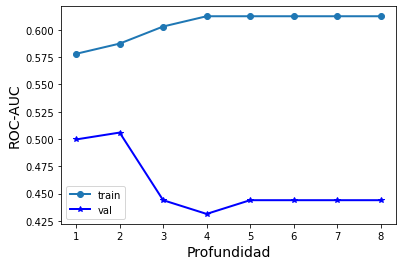

Mejor ROC-AUC en validación cruzada: 0.506
Mejor valor del hiperparámetro: {'max_depth': 2}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 3, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=3), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5853658536585366
[[17  3]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5853658536585366


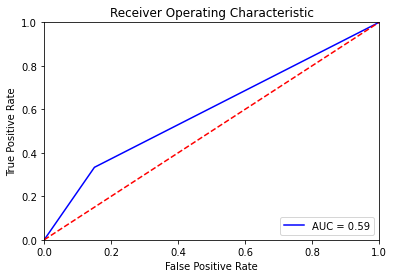

(160, 5) (160,) (41, 5) (41,)
     LifeEmpty  PrefStayHome  MoreMemProb  WondAlive  HopelessSit
54           1           1.0            1        0.0            1
28           1           0.0            0        0.0            1
25           1           1.0            1        0.0            1
21           0           0.0            1        0.0            1
24           1           0.0            1        0.0            1
..         ...           ...          ...        ...          ...
130          1           1.0            0        0.0            1
146          1           1.0            1        0.0            1
29           0           0.0            0        0.0            0
43           1           0.0            1        0.0            1
92           1           1.0            1        0.0            1

[160 rows x 5 columns]
{'max_depth': 1}


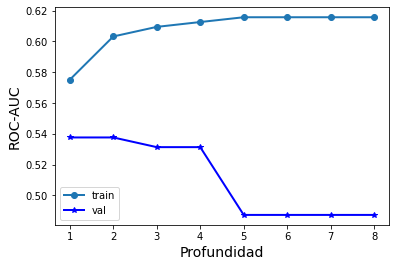

Mejor ROC-AUC en validación cruzada: 0.538
Mejor valor del hiperparámetro: {'max_depth': 1}
{'cv': 3, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 4, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=4), 'n_jobs': None, 'param_grid': {'max_depth': range(1, 9)}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': 'accuracy', 'verbose': 0}
0.5365853658536586
[[15  5]
 [14  7]]
Sensibilidad y Accuracy 0.3333333333333333 0.5365853658536586


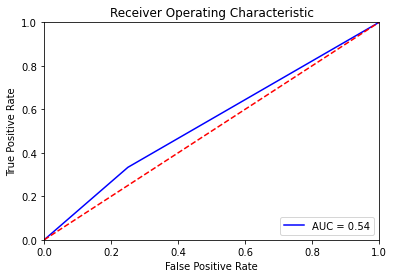

In [69]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []
for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS4, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = decisionTree(X_train, X_test, Y_train, Y_test, i)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[4])

In [70]:
media_log = statistics.mean(roc) # 7
desviacion_estandar_log = statistics.stdev(roc) # 5.164...


model2_FS.append("DT")
mean2_FS.append(media_log)
std2_FS.append(desviacion_estandar_log)


print(media_log, desviacion_estandar_log)


media_sen_logarit = statistics.mean(accuracy) # 7
desviacion_estandar_sen_logarit = statistics.stdev(accuracy) # 5.164...


model_FS.append("DT")
mean_FS.append(media_sen_logarit)
std_FS.append(desviacion_estandar_sen_logarit)
print(media_sen_logarit, desviacion_estandar_sen_logarit)

media_des3 = statistics.mean(sensi) # 7
desviacion_des_knn3 = statistics.stdev(sensi) # 5.164...

print(media_des3, desviacion_des_knn3)

media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.5680952380952381 0.06301882164945775
0.5609756097560976 0.06453051978206317
0.27619047619047615 0.14443572274383906
0.86 0.07416198487095663


# Regresión logística

# Reg. Logística Lasso

(160, 5) (160,) (41, 5) (41,)
{'C': 1}
0.6
[[18  2]
 [19  2]]
tn: 18, fp:2, fn:19, tp:2
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      0.90      0.63        20
    Diabetic       0.50      0.10      0.16        21

    accuracy                           0.49        41
   macro avg       0.49      0.50      0.40        41
weighted avg       0.49      0.49      0.39        41

Sensibilidad: 0.09523809523809523


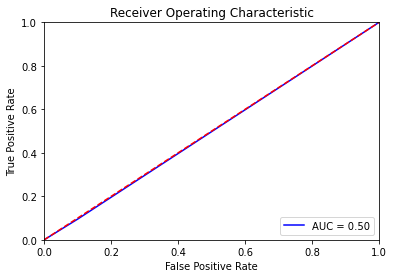

(160, 5) (160,) (41, 5) (41,)
{'C': 1}
0.5625
[[17  3]
 [12  9]]
tn: 17, fp:3, fn:12, tp:9
Accuracy: 0.6341463414634146
              precision    recall  f1-score   support

Non-diabetic       0.59      0.85      0.69        20
    Diabetic       0.75      0.43      0.55        21

    accuracy                           0.63        41
   macro avg       0.67      0.64      0.62        41
weighted avg       0.67      0.63      0.62        41

Sensibilidad: 0.42857142857142855


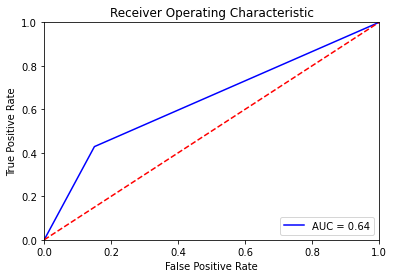

(160, 5) (160,) (41, 5) (41,)
{'C': 1}
0.50625
[[19  1]
 [14  7]]
tn: 19, fp:1, fn:14, tp:7
Accuracy: 0.6341463414634146
              precision    recall  f1-score   support

Non-diabetic       0.58      0.95      0.72        20
    Diabetic       0.88      0.33      0.48        21

    accuracy                           0.63        41
   macro avg       0.73      0.64      0.60        41
weighted avg       0.73      0.63      0.60        41

Sensibilidad: 0.3333333333333333


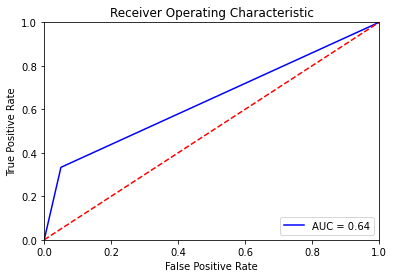

(160, 5) (160,) (41, 5) (41,)
{'C': 0.0001}
0.5
[[20  0]
 [21  0]]
tn: 20, fp:0, fn:21, tp:0
Accuracy: 0.4878048780487805
              precision    recall  f1-score   support

Non-diabetic       0.49      1.00      0.66        20
    Diabetic       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41

Sensibilidad: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


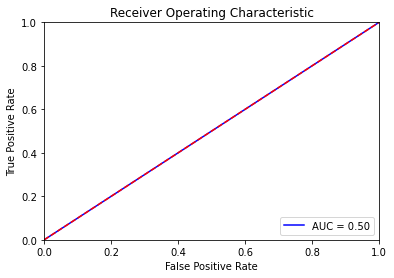

(160, 5) (160,) (41, 5) (41,)
{'C': 1}
0.58125
[[15  5]
 [14  7]]
tn: 15, fp:5, fn:14, tp:7
Accuracy: 0.5365853658536586
              precision    recall  f1-score   support

Non-diabetic       0.52      0.75      0.61        20
    Diabetic       0.58      0.33      0.42        21

    accuracy                           0.54        41
   macro avg       0.55      0.54      0.52        41
weighted avg       0.55      0.54      0.52        41

Sensibilidad: 0.3333333333333333


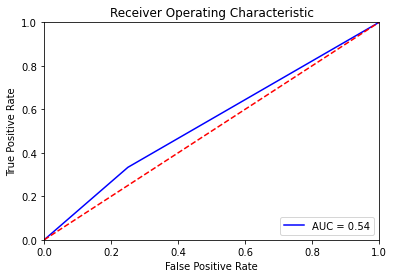

In [71]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
sensi = []
accuracy = []
roc = []
espe = []

for i in range(0, 5):
    X_train, X_test, Y_train, Y_test = train_test_split(data_input_FS4, data_output, stratify= data_output, test_size=0.2, random_state=i)

    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    list_x_train.append(X_train)
    list_y_train.append(Y_train)

    list_y_test.append(Y_test)

    list_x_test.append(X_test)
    
    
    # 3. Estandarización de cada característica de entrada considerando los parámetros obtenidos sobre el subconjunto de train
    scaler_mlp = StandardScaler().fit(X_train)
    X_train_mlp_norm = scaler_mlp.transform(X_train)
    X_test_mlp_norm  = scaler_mlp.transform(X_test)


    b = reg_Lasso(X_train, X_test, Y_train, Y_test)
    sensi.append(b[0])
    accuracy.append(b[1])
    roc.append(b[2])
    espe.append(b[4])

In [72]:
media_lasso = statistics.mean(accuracy) # 7
desviacion_estandar_lasso = statistics.stdev(accuracy) # 5.164...


model_FS.append("LASSO")
mean_FS.append(media_lasso)
std_FS.append(desviacion_estandar_lasso)
print(media_lasso, desviacion_estandar_lasso)

media_lasso2 = statistics.mean(roc) # 7
desviacion_estandar_lasso2 = statistics.stdev(roc) # 5.164...
print(media_lasso2, desviacion_estandar_lasso2)

model2_FS.append("LASSO")
mean2_FS.append(media_lasso2)
std2_FS.append(desviacion_estandar_lasso2)


media_lasso3 = statistics.mean(sensi) # 7
desviacion_estandar_lasso3 = statistics.stdev(sensi) # 5.164...
print(media_lasso3, desviacion_estandar_lasso3)

media_knn4 = statistics.mean(espe) # 7
desviacion_estandar_knn4 = statistics.stdev(espe) # 5.164...

print(media_knn4, desviacion_estandar_knn4)

0.5560975609756098 0.07397927262489319
0.564047619047619 0.07193963991696938
0.23809523809523808 0.1813279310919978
0.89 0.09617692030835673


In [73]:
df_metrics = pd.DataFrame()


df_metrics["model"] = model_FS
df_metrics["mean"] = mean_FS
df_metrics["std"] = std_FS

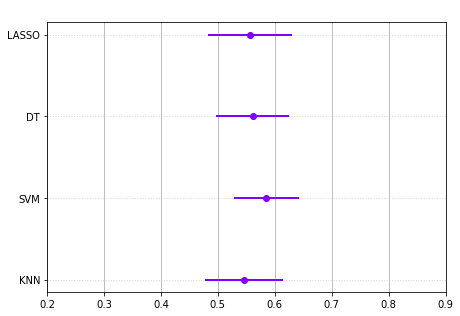

In [74]:
plot_mean_std_metric(df_metrics, lims=(0.2, 0.9), title_figure=' ', flag_save_figure=True)




In [75]:
df_metrics2 = pd.DataFrame()


df_metrics2["model"] = model2_FS
df_metrics2["mean"] = mean2_FS
df_metrics2["std"] = std2_FS

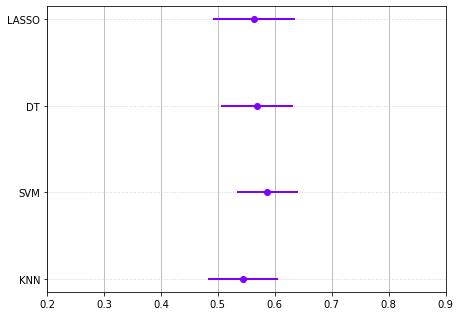

In [76]:
plot_mean_std_metric(df_metrics2, lims=(0.2, 0.9), title_figure='',flag_save_figure=True)